# Farmer - Query EDA
## Team_ID_31
### Authors:
#### Akshit-2018A7PS0187H
#### Hritik Singh Kushawah-2018A7PS0323H
#### Smiket Barodia-2018A7PS0231H

# Installing Modules

In [1]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks
plt.rcParams.update({'font.size': 30})
from seaborn import axes_style

# Reading Merged Dataset

In [4]:
df =pd.read_csv(r'../data/newFinal.csv')
df.drop('Season',axis=1,inplace=True)
df.drop('KccAns',axis=1,inplace=True)
df['Month'] = pd.DatetimeIndex(df['CreatedOn']).month

Mmap= {1:"January",2:"Feburary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}

df['Month']=df['Month'].map(Mmap)
df.drop('CreatedOn',axis=1,inplace=True)
df.drop('QueryText',axis=1,inplace=True)
#df.drop('BlockName',axis=1,inplace=True)
#df.drop('DistrictName',axis=1,inplace=True)
x=df.isna().sum()
x

Sector          2
Category        2
Crop            2
QueryType       2
StateName       2
DistrictName    2
BlockName       2
Month           2
dtype: int64

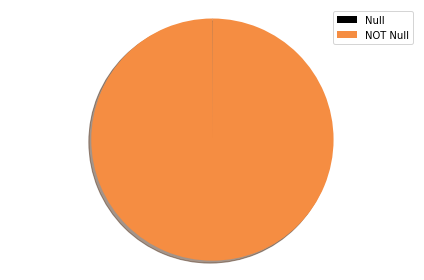

In [5]:
labels = ['Null', 'NOT Null']
sizes = [x.sum(), df.shape[0]]
colors = ['black', '#f58d42']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [6]:
df['StateName'].unique()

array(['HARYANA', nan, 'GUJARAT', 'JAMMU AND KASHMIR', 'TAMILNADU',
       'UTTAR PRADESH', 'RAJASTHAN'], dtype=object)

In [7]:
import folium
world_map=world_map = folium.Map(location=[20.5937, 78.9629],tiles="Stamen Terrain",zoom_start=4)
folium.Marker(location=[29.0588, 76.0856], 
                  icon= folium.Icon(color="RED", 
                  icon_color='yellow',icon = 'info-sign')).add_to(world_map)
folium.Marker(location=[22.2587, 71.1924], 
                  icon= folium.Icon(color="red", 
                  icon_color='yellow',icon = 'info-sign')).add_to(world_map)
folium.Marker(location=[33.7782, 76.5762], 
                  icon= folium.Icon(color="RED", 
                  icon_color='yellow',icon = 'info-sign')).add_to(world_map)
# folium.Marker(location=[26.2006, 92.9376], 
#                   icon= folium.Icon(color="RED", 
#                   icon_color='yellow',icon = 'info-sign')).add_to(world_map)
folium.Marker(location=[19.7515, 75.7139], 
                  icon= folium.Icon(color="RED", 
                  icon_color='yellow',icon = 'info-sign')).add_to(world_map)
folium.Marker(location=[11.1271, 78.6569], 
                  icon= folium.Icon(color="RED", 
                  icon_color='yellow',icon = 'info-sign')).add_to(world_map)
world_map

### These all States have picked up for Data Analysis.(JAMMU N KASHMIR,RAJASTHAN,GUJRAT,UP,HARYANA,TAMIL NADU)

# Data Cleaning

In [8]:
df.replace('0',np.nan,True)
df.dropna(axis=0,inplace=True)
df.shape
df.replace('\tPlant Protection\t','Plant Protection',True)
df.replace('Bengal Gram (Gram/Chick Pea/Kabuli/Chana)','Bengal Gram',True)
df.reset_index(drop=True,inplace=True)
df2=df   #Clustering
df1= df  #Akshit
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0

In [9]:
df.isna().sum()

Sector          0
Category        0
Crop            0
QueryType       0
StateName       0
DistrictName    0
BlockName       0
Month           0
dtype: int64

In [10]:
st = df["Sector"].value_counts().to_frame()

In [11]:
st.rename(columns={'Sector':'count'},inplace = True)
st.reset_index()
st.rename(columns={'index':'Sector'},inplace = True)
st

,count
AGRICULTURE,38026
HORTICULTURE,5461
ANIMAL HUSBANDRY,423
FISHERIES,41


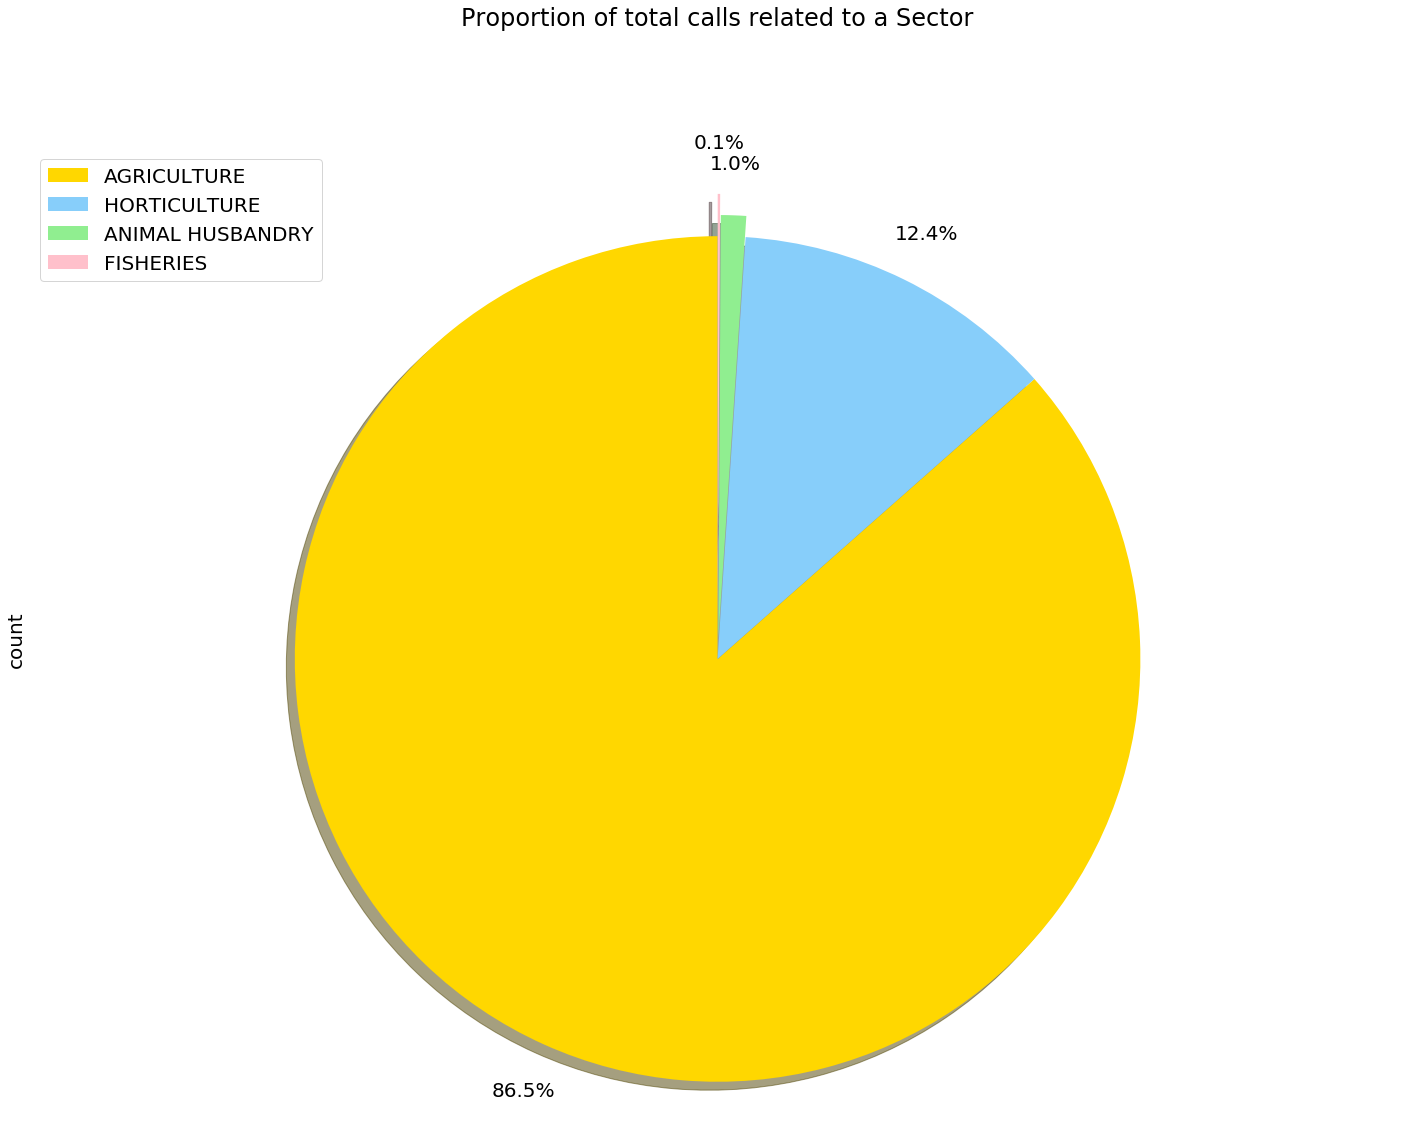

In [12]:
colors_list = ['gold', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [ 0, 0, 0.05, 0.1] # ratio for each continent with which to offset each wedge.

st['count'].plot(kind='pie',
                            figsize=(20, 16),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Proportion of total calls related to a Sector', y=1.12) 

plt.axis('equal') 
plt.tight_layout()
# add legend
plt.legend(labels=st.index, loc='upper left',prop={'size':20}) 
plt.show()

### AGRICULTURE IS THE MOST QUIRED SECTOR AND FISHRIES IS THE MOST NEGLECTED SECTOR

In [13]:
ct = df['Category'].value_counts().to_frame()
ct.reset_index()
ct.rename(columns={'Category':'count','index':'Category'},inplace=True)
ct.reset_index(inplace=True)   
ct.rename(columns={'index':'Category'},inplace=True)
ct.head()

,Category,count
0,Others,28597
1,Cereals,5401
2,Vegetables,2721
3,Fruits,1407
4,Condiments and Spices,1035


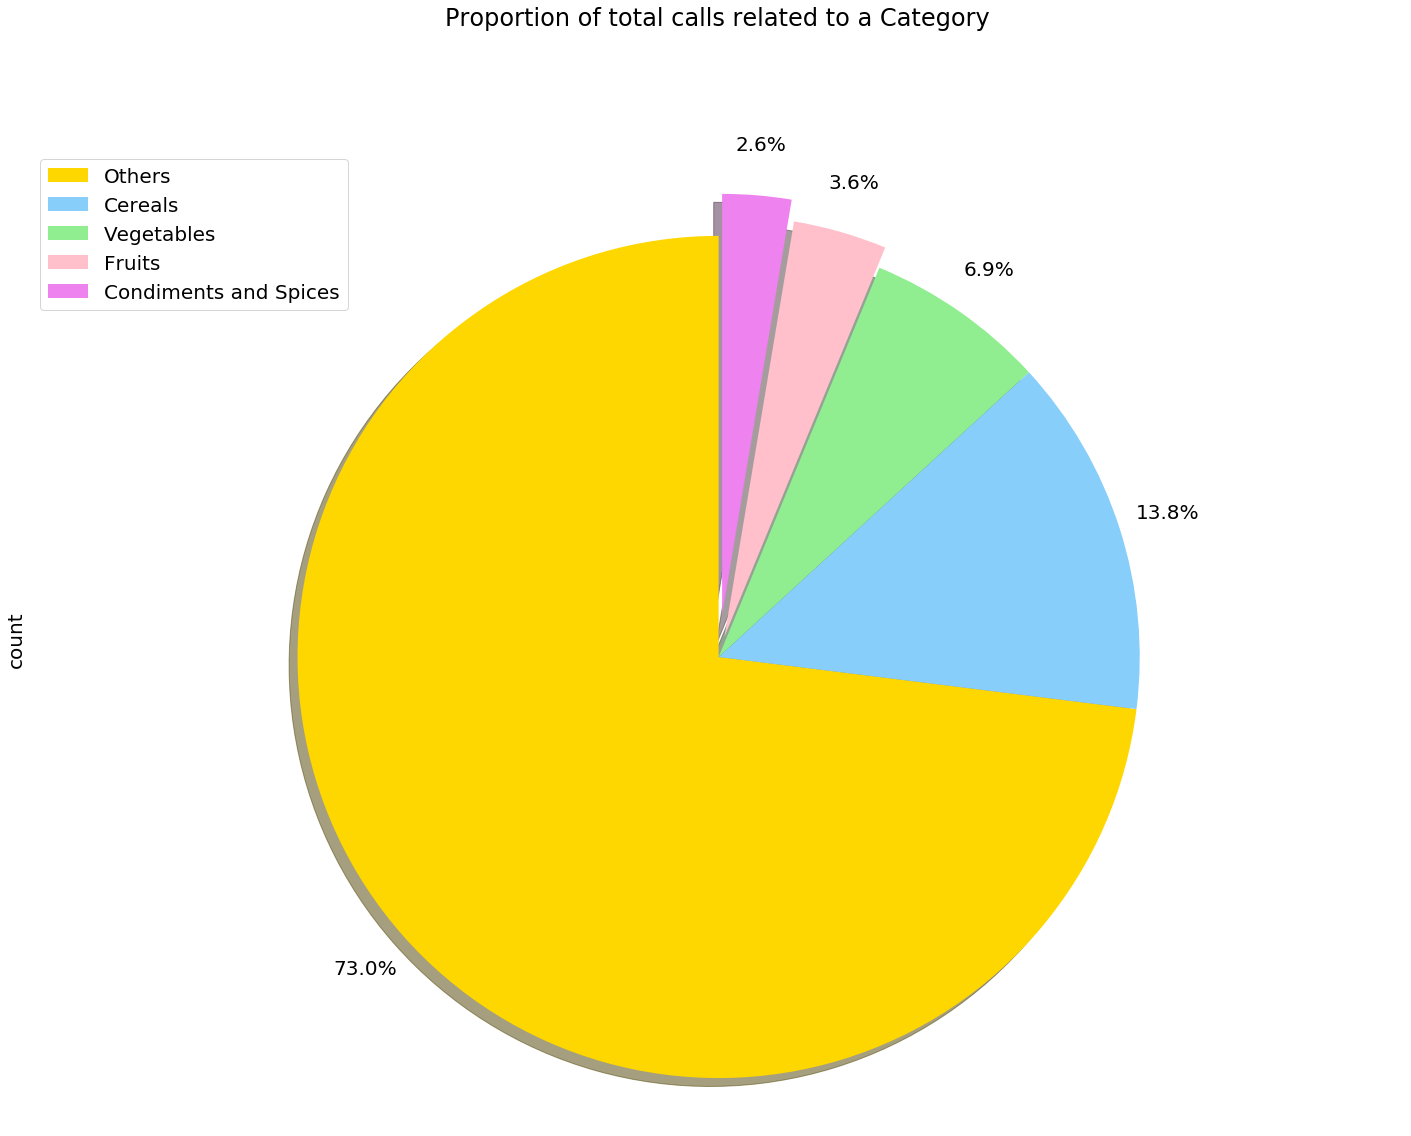

In [14]:
colors_list = ['gold', 'lightskyblue', 'lightgreen', 'pink','violet']
explode_list = [ 0, 0,0, 0.05, 0.1] # ratio for each continent with which to offset each wedge.

ct['count'].head(5).plot(kind='pie',
                            figsize=(20, 16),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Proportion of total calls related to a Category', y=1.12) 

plt.axis('equal') 
plt.tight_layout()
# add legend
plt.legend(labels=ct.Category, loc='upper left',prop={'size':20}) 

plt.show()

### 'Others' have most proportion implying data have not been filled correctly by data collector for Category 

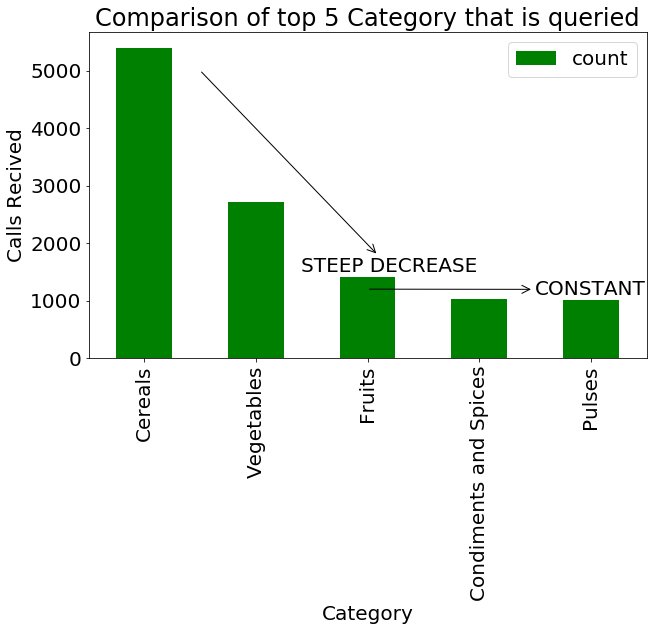

In [15]:
ct.drop(ct.index[0],axis=0,inplace=True)

ct.head(5).plot.bar(x='Category',figsize=(10, 6), rot=90,color="green") 

plt.ylabel('Calls Recived')
plt.xlabel('Category')
plt.title('Comparison of top 5 Category that is queried')
plt.annotate("STEEP DECREASE",xy=(0.5,5000),xytext=(1.4,1500),arrowprops=dict(arrowstyle="<-"))
plt.annotate("CONSTANT",xy=(2,1200),xytext=(3.5,1100),arrowprops=dict(arrowstyle="<-"))
plt.show()

### In known categories only 'Cereals' and 'Vegetables' are most quired rest top categories have almost same  quiry proportion

In [16]:
df['Category'].unique()

array(['Others', 'Vegetables', 'Cereals', 'Fodder Crops', 'Animal',
       'Pulses', 'Oilseeds', 'Fruits', 'Condiments and Spices', 'Millets',
       'Sugar and Starch Crops', 'Fiber Crops', 'Green Manure', 'Flowers',
       'Marine', 'Beekeeping', 'Plantation Crops', 'Inland',
       'Medicinal and Aromatic Plants', 'Avian', 'Drug and Narcotics'],
      dtype=object)

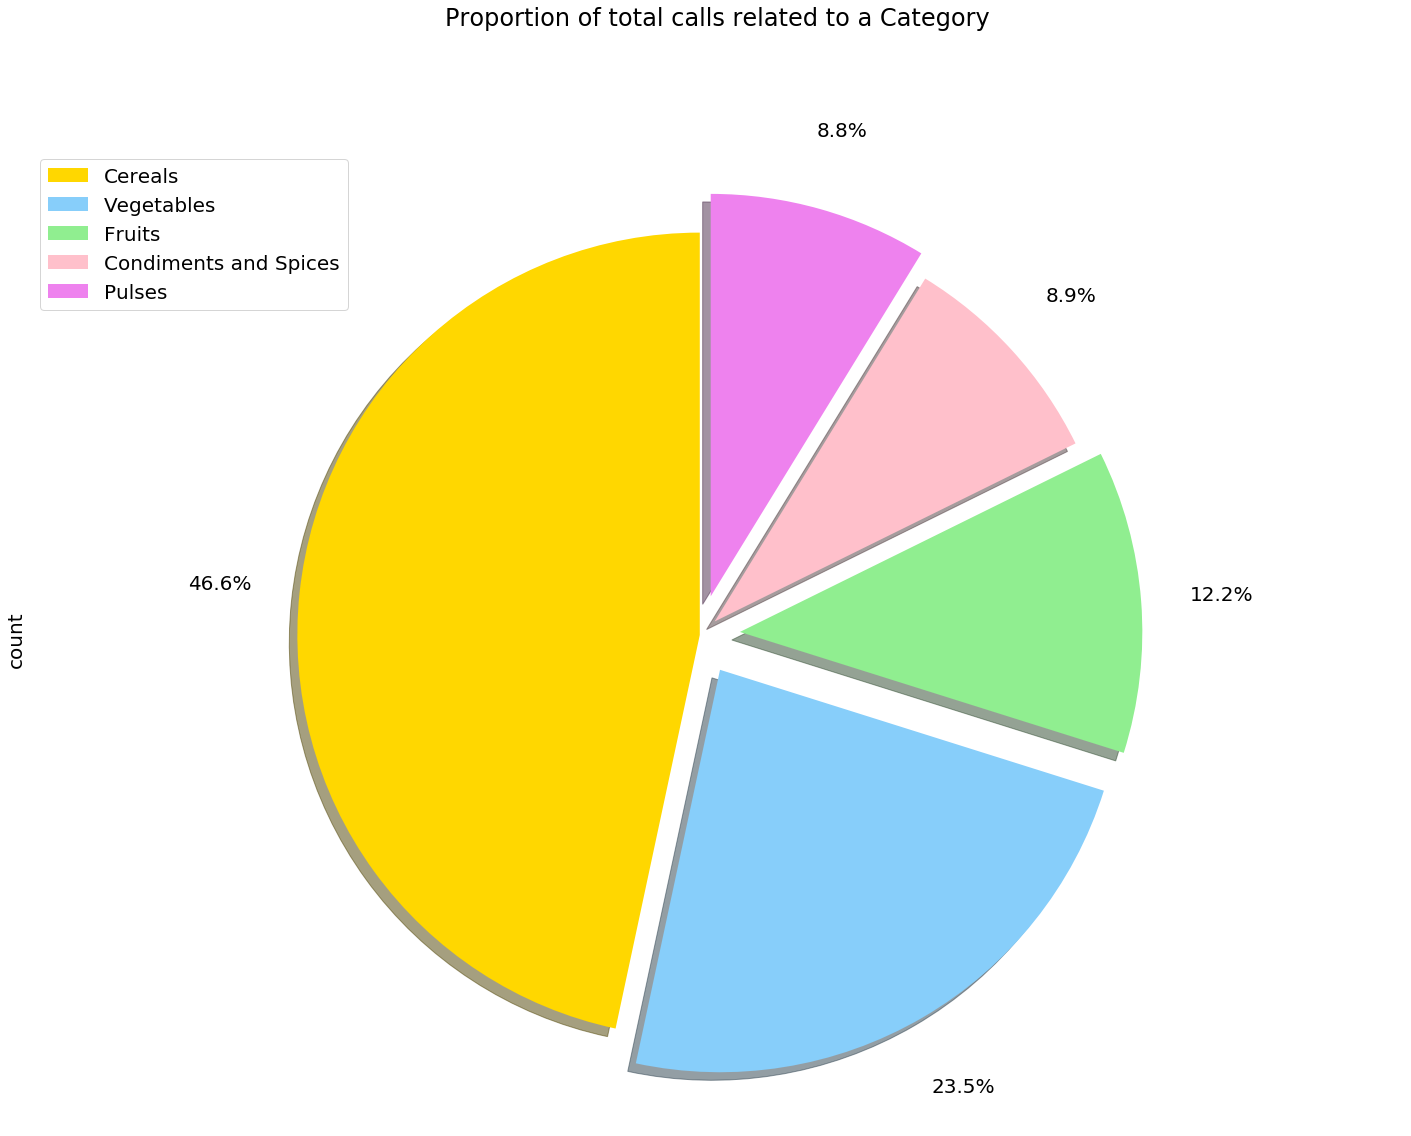

In [17]:
colors_list = ['gold', 'lightskyblue', 'lightgreen', 'pink','violet']
explode_list = [ 0, 0.1,0.1, 0.05, 0.1] # ratio for each continent with which to offset each wedge.

ct['count'].head(5).plot(kind='pie',
                            figsize=(20, 16),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.2,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Proportion of total calls related to a Category', y=1.12) 

plt.axis('equal') 
plt.tight_layout()
# add legend
plt.legend(labels=ct.Category, loc='upper left',prop={'size':20}) 

plt.show()

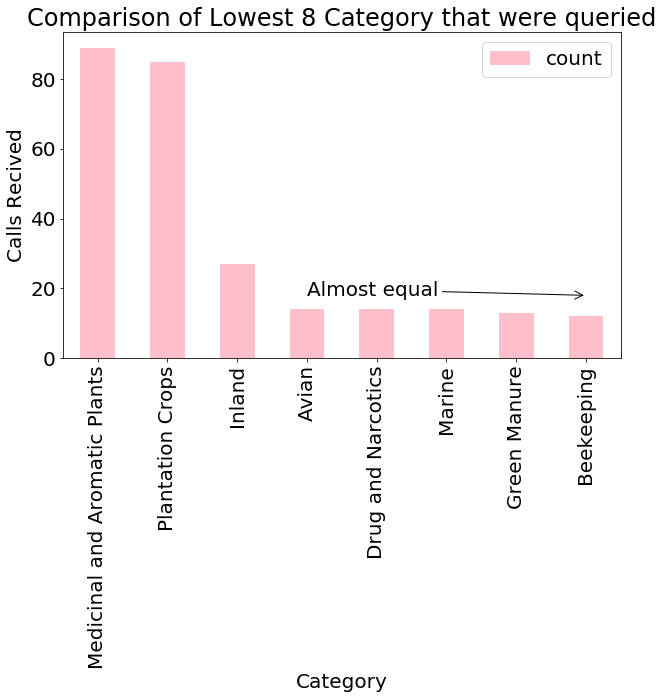

In [18]:
ct.tail(8).plot.bar(x='Category',figsize=(10, 6), rot=90,color="pink") 

plt.ylabel('Calls Recived')
plt.xlabel('Category')
plt.title('Comparison of Lowest 8 Category that were queried')
#plt.annotate("STEEP DECREASE",xy=(0.5,4250),xytext=(1.7,1700),arrowprops=dict(arrowstyle="<-"))
plt.annotate("Almost equal",xy=(7,18),xytext=(3,18),arrowprops=dict(arrowstyle="->"))
plt.show()

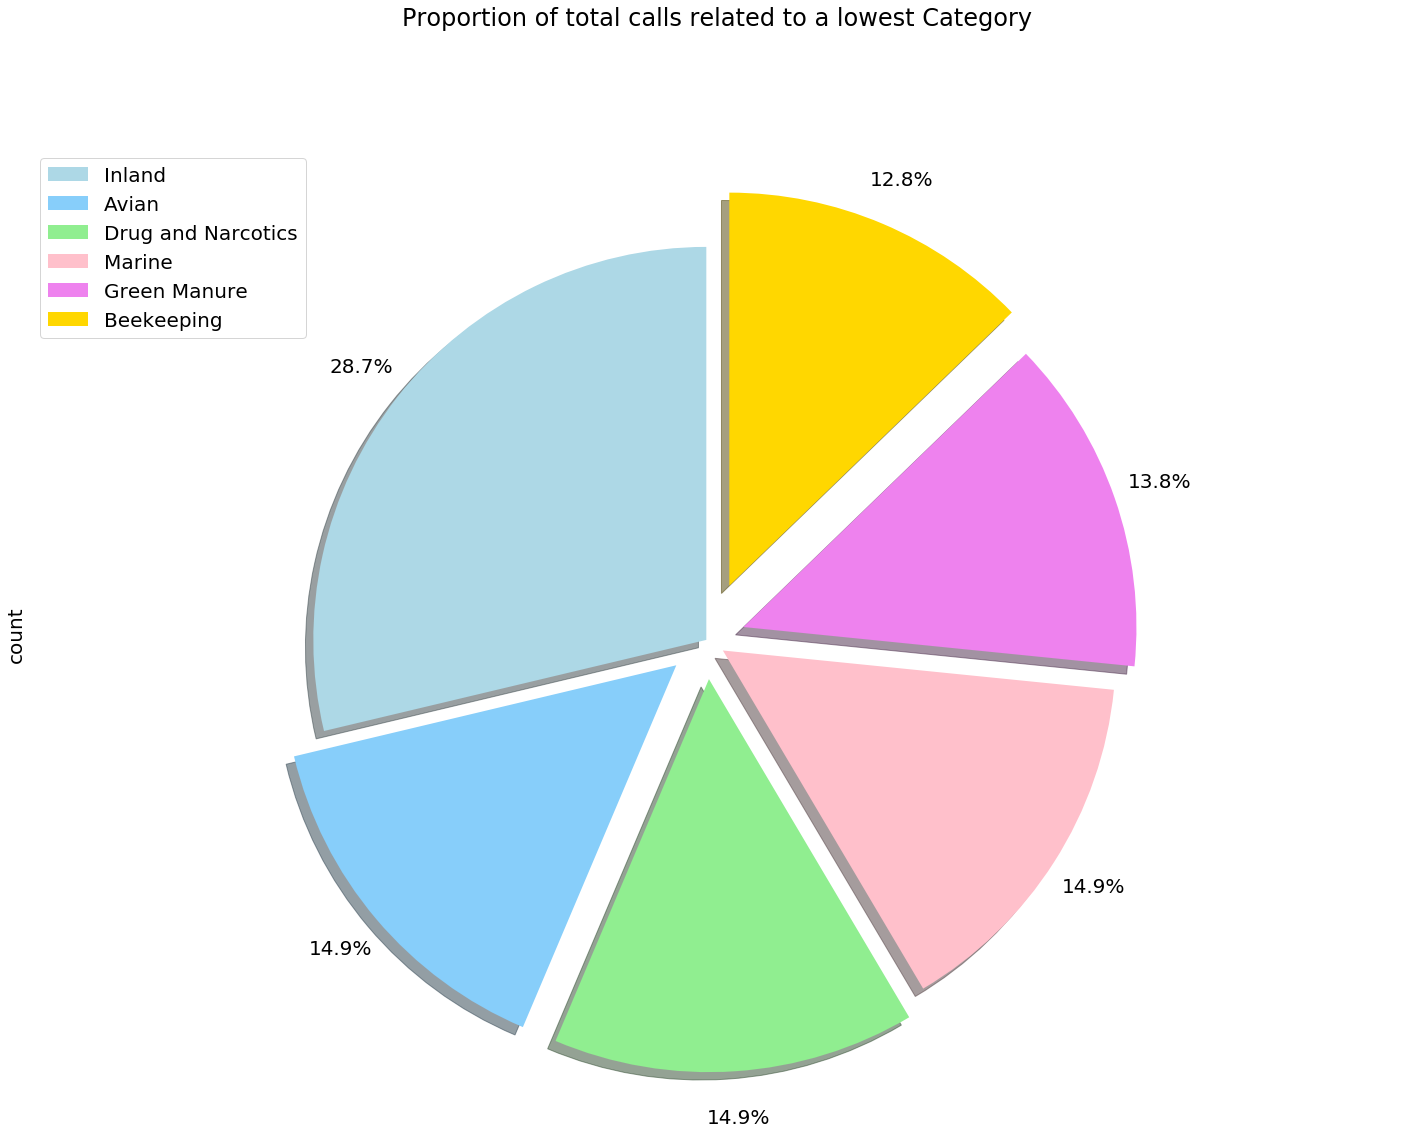

In [19]:
colors_list = ['lightblue', 'lightskyblue', 'lightgreen', 'pink','violet','gold']
explode_list = [ 0, 0.1,0.1, 0.05, 0.1,0.15] # ratio for each continent with which to offset each wedge.

ct['count'].tail(6).plot(kind='pie',
                            figsize=(20, 16),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Proportion of total calls related to a lowest Category', y=1.12) 

plt.axis('equal') 
plt.tight_layout()
# add legend
plt.legend(labels=ct["Category"].tail(6), loc='upper left',prop={'size':20}) 

plt.show()

### Mostly Dominated by fish and fish realted quires 

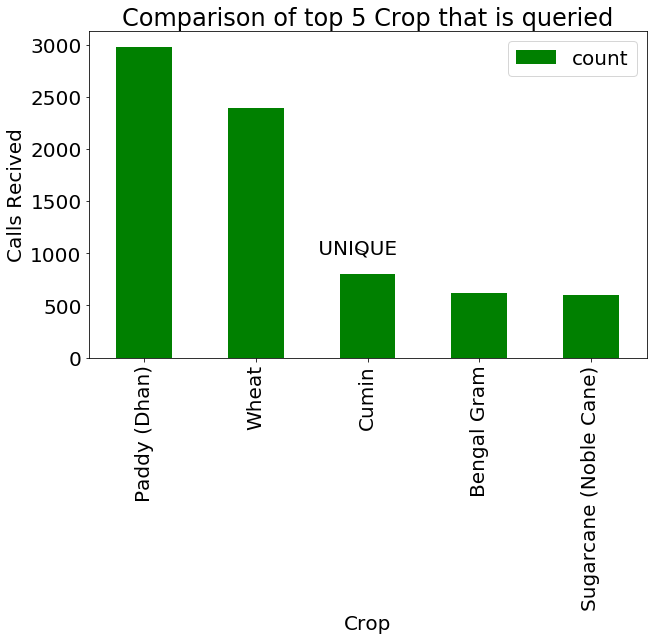

In [20]:
cr = df["Crop"].value_counts().to_frame()
cr.drop(cr.index[0],inplace = True)
cr.reset_index(inplace=True)
cr.rename(columns={'index':'Crop','Crop':'count'},inplace = True)
cr.head()
cr.index.astype('object')
cr.head(5).plot.bar(x='Crop',figsize=(10, 6), rot=90,color="green") 
plt.ylabel('Calls Recived')
plt.xlabel('Crop')
plt.title('Comparison of top 5 Crop that is queried')
plt.annotate(" UNIQUE",xy=(2,1000),xytext=(1.5,1000),arrowprops=dict(arrowstyle="-"))
plt.show()

### Quires realted to cumin is 3rd most frequent quires for Crops that is quite unique  

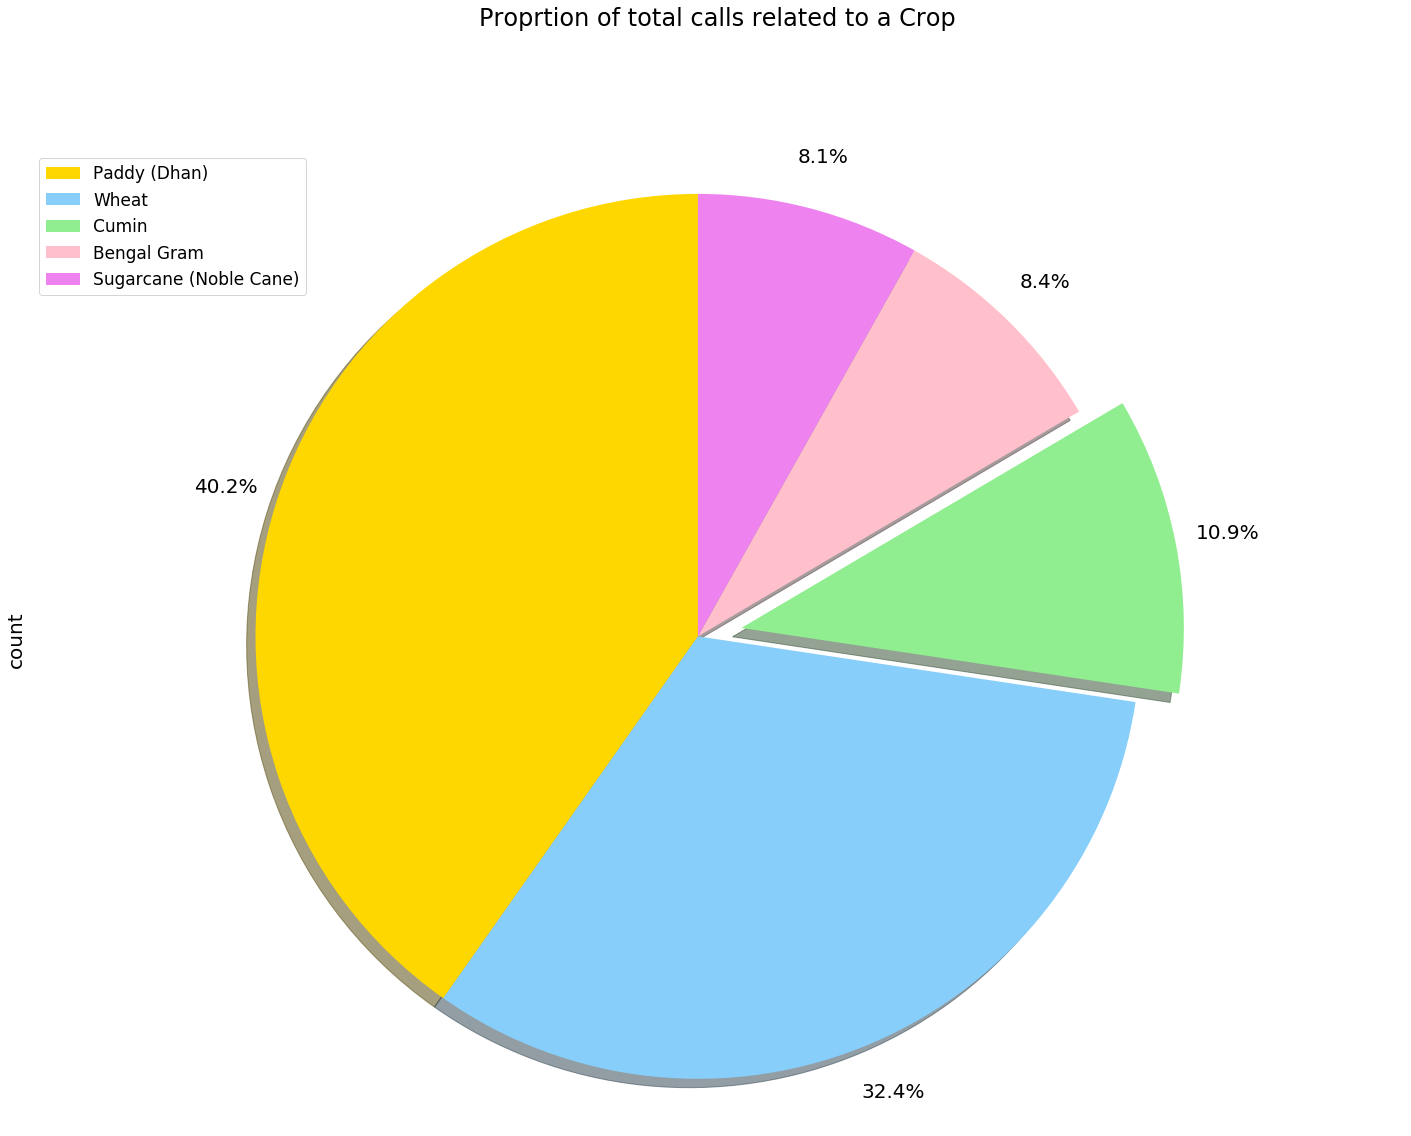

In [21]:
colors_list = ['gold', 'lightskyblue', 'lightgreen', 'pink','violet']
explode_list = [ 0, 0,0.1, 0, 0] # ratio for each continent with which to offset each wedge.

cr['count'].head(5).plot(kind='pie',
                            figsize=(20, 16),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Proprtion of total calls related to a Crop', y=1.12) 

plt.axis('equal') 
plt.tight_layout()
# add legend
plt.legend(labels=cr["Crop"].head(5), loc='upper left',prop={'size':17}) 

plt.show()

In [22]:
cr.describe()

,count
count,222.000000
mean,69.261261
std,273.785139
min,1.000000
25%,2.000000
50%,7.000000
75%,30.750000
max,2977.000000


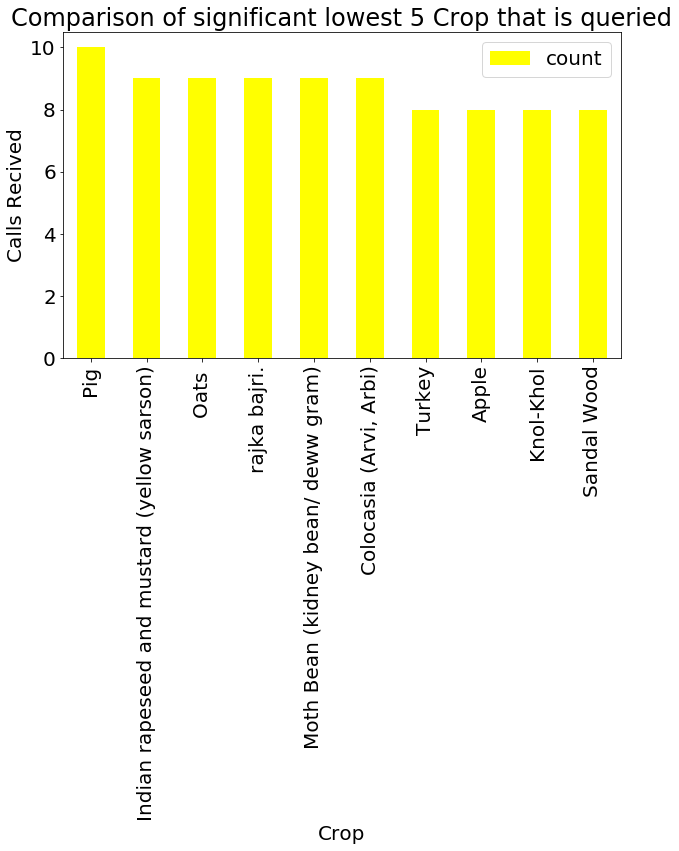

In [23]:
df_cr = cr[cr['count'] < 30.7500]
df_cr=df_cr[df_cr['count']>7.0000]
df_cr.tail(10).plot.bar(x='Crop',figsize=(10, 6), rot=90,color="yellow") 

plt.ylabel('Calls Recived')
plt.xlabel('Crop')
plt.title('Comparison of significant lowest 5 Crop that is queried')
#plt.annotate(" UNIQUE",xy=(3,450),xytext=(4,400),arrowprops=dict(arrowstyle="<-"))
plt.show()

#### SANDAL WOOD IS LEAST QUIRED AND YET INDIA IS ONE OF THE BIGGEST PRODUCER OF IT  

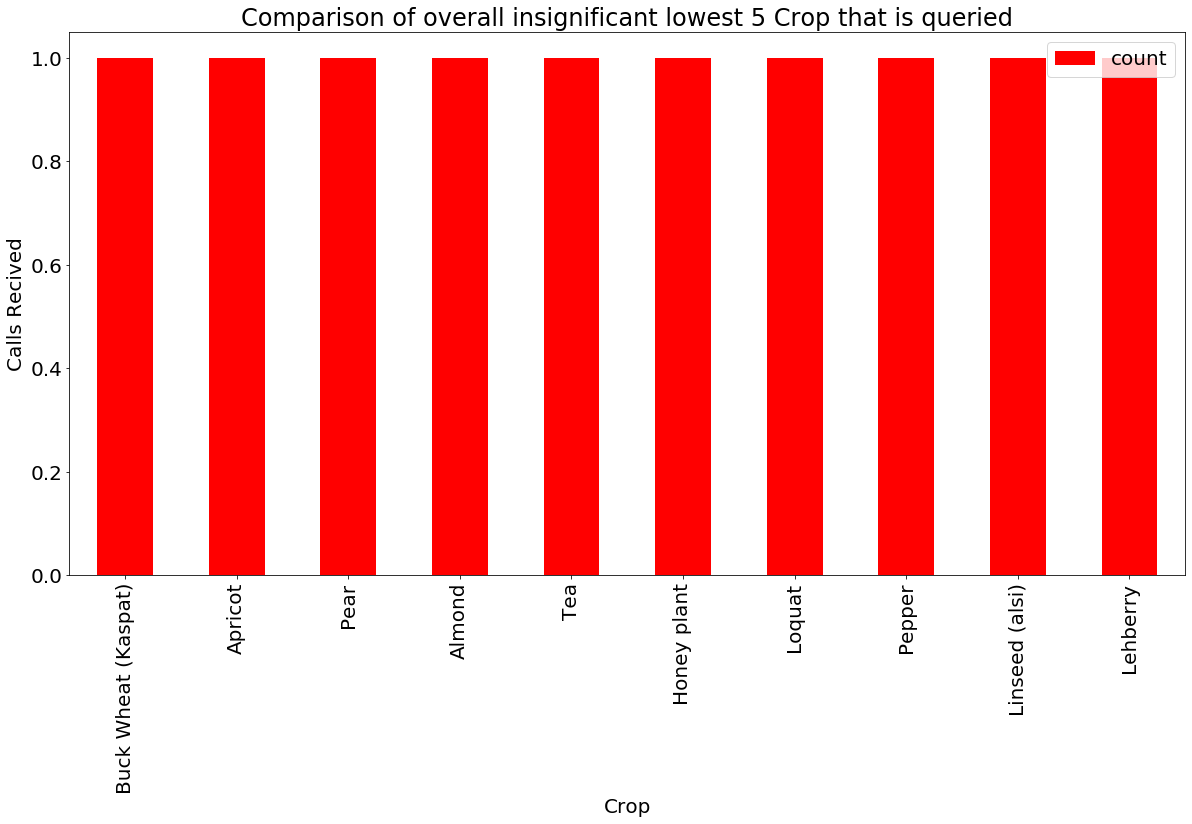

In [24]:
cr.tail(10).plot.bar(x='Crop',figsize=(20, 10), rot=90,color="red") 

plt.ylabel('Calls Recived')
plt.xlabel('Crop')
plt.title('Comparison of overall insignificant lowest 5 Crop that is queried')
#plt.annotate(" UNIQUE",xy=(3,450),xytext=(4,400),arrowprops=dict(arrowstyle="<-"))
plt.show()

In [25]:
qr = df["QueryType"].value_counts().to_frame()
qr.reset_index(inplace=True)
qr.rename(columns={'QueryType':'count','index':'QueryType'},inplace=True)
qr.head()

,QueryType,count
0,Weather,23944
1,Plant Protection,6764
2,Government Schemes,2734
3,Nutrient Management,2255
4,Cultural Practices,1305


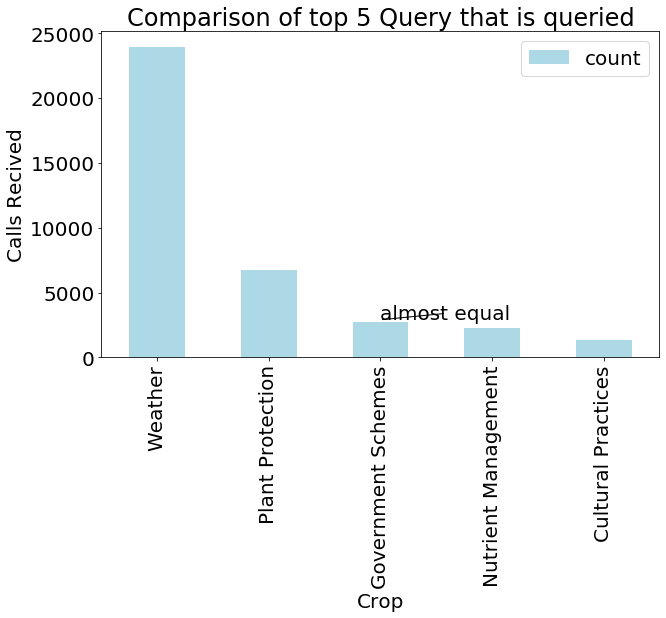

In [26]:
qr.head(5).plot.bar(x='QueryType',figsize=(10, 6), rot=90,color="lightblue") 

plt.ylabel('Calls Recived')
plt.xlabel('Crop')
plt.title('Comparison of top 5 Query that is queried')
plt.annotate("almost equal",xy=(2,2900),xytext=(2,2970),arrowprops=dict(arrowstyle="-"))
plt.show()

### PEOPLE ARE CONCERNED ABOUT THE GOVT SCHEMES TOO 

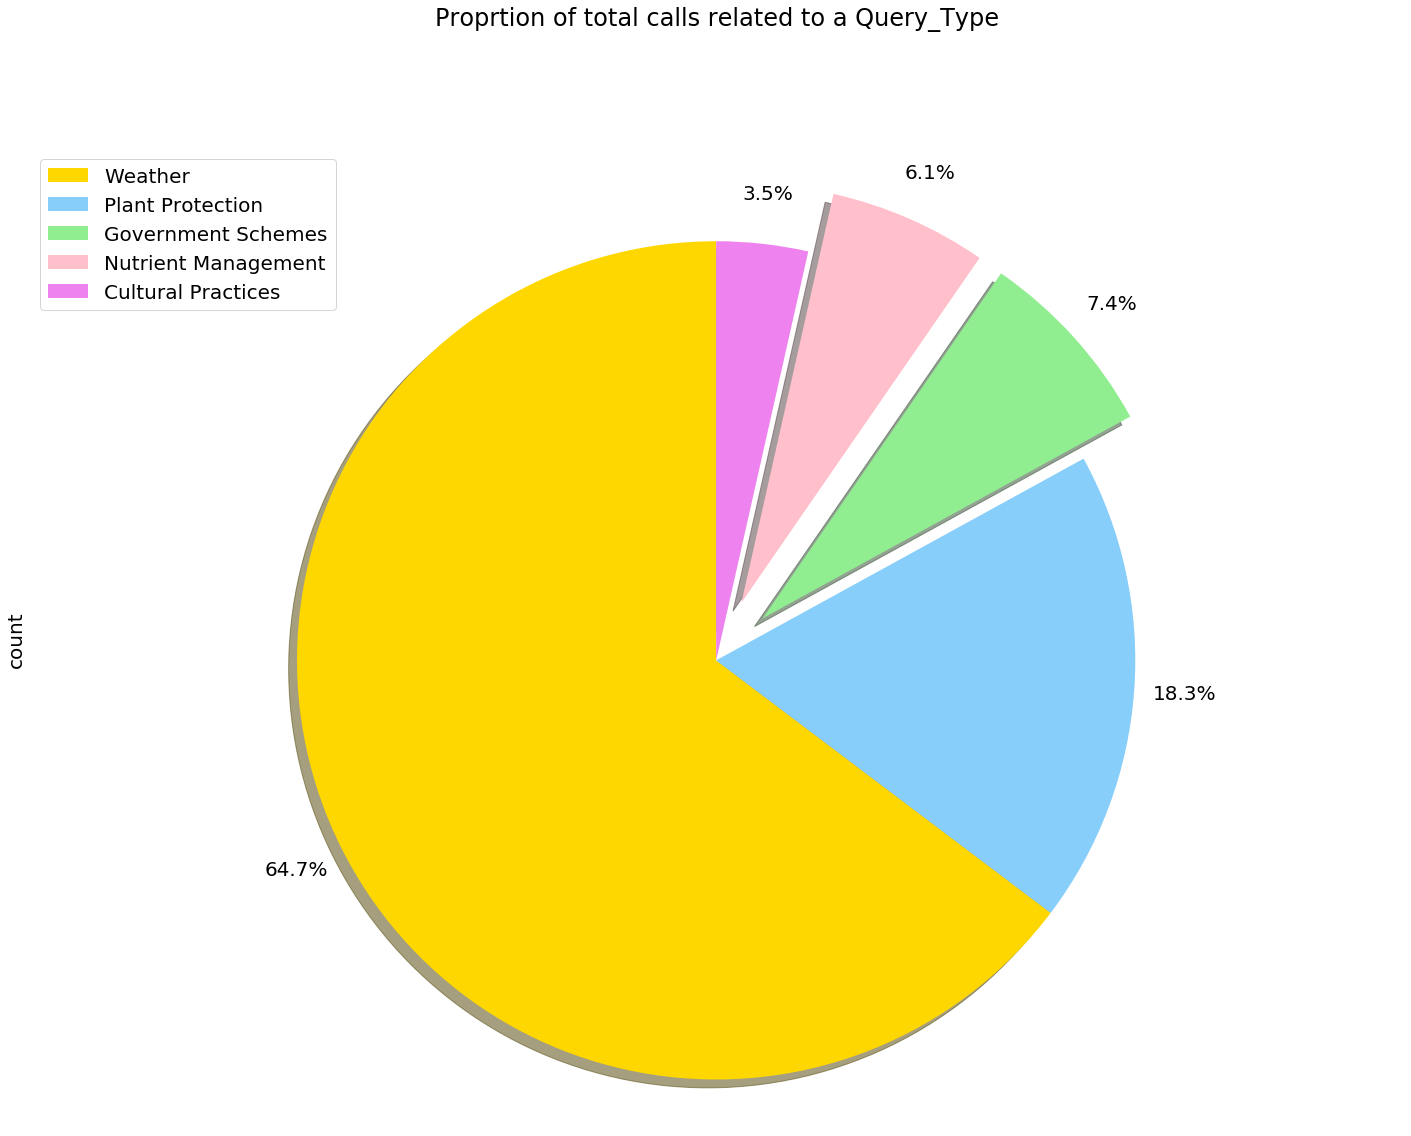

In [27]:
colors_list = ['gold', 'lightskyblue', 'lightgreen', 'pink','violet']
explode_list = [ 0, 0,0.15, 0.15, 0.0] # ratio for each continent with which to offset each wedge.

qr['count'].head(5).plot(kind='pie',
                            figsize=(20, 16),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Proprtion of total calls related to a Query_Type', y=1.12) 

plt.axis('equal') 
plt.tight_layout()
# add legend
plt.legend(labels=qr["QueryType"].head(5), loc='upper left',prop={'size':20}) 

plt.show()

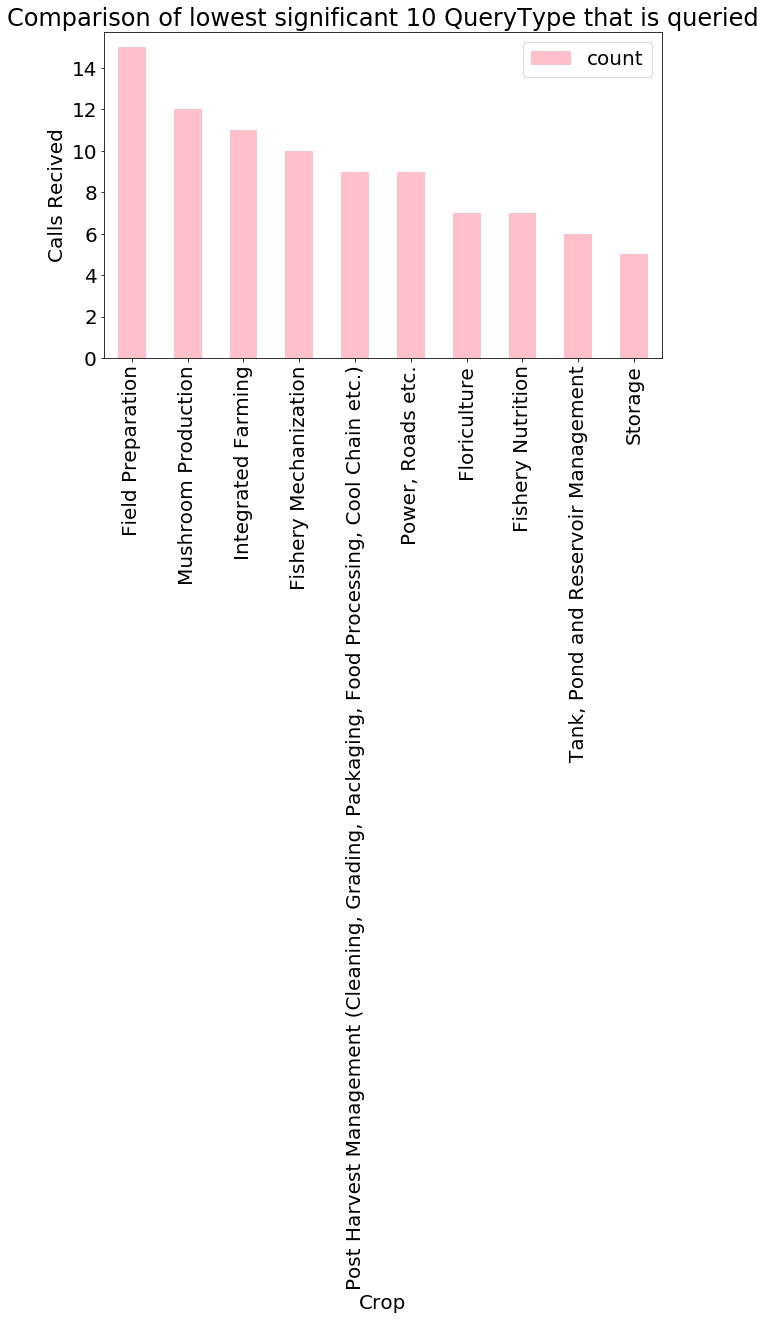

In [28]:
df_qr = qr[qr['count'] < 36.00]
df_qr=df_qr[df_qr['count']>4.0000]

df_qr.tail(10).plot.bar(x='QueryType',figsize=(10, 6), rot=90,color="pink") 

plt.ylabel('Calls Recived')
plt.xlabel('Crop')
plt.title('Comparison of lowest significant 10 QueryType that is queried')
#plt.annotate(" UNIQUE",xy=(3,450),xytext=(4,400),arrowprops=dict(arrowstyle="<-"))
plt.show()

### MOSTLY LEAST QUIRED QUERYTYPE ARE RELATED TO INFRASTRUCTUTRE AND MACHINERY 

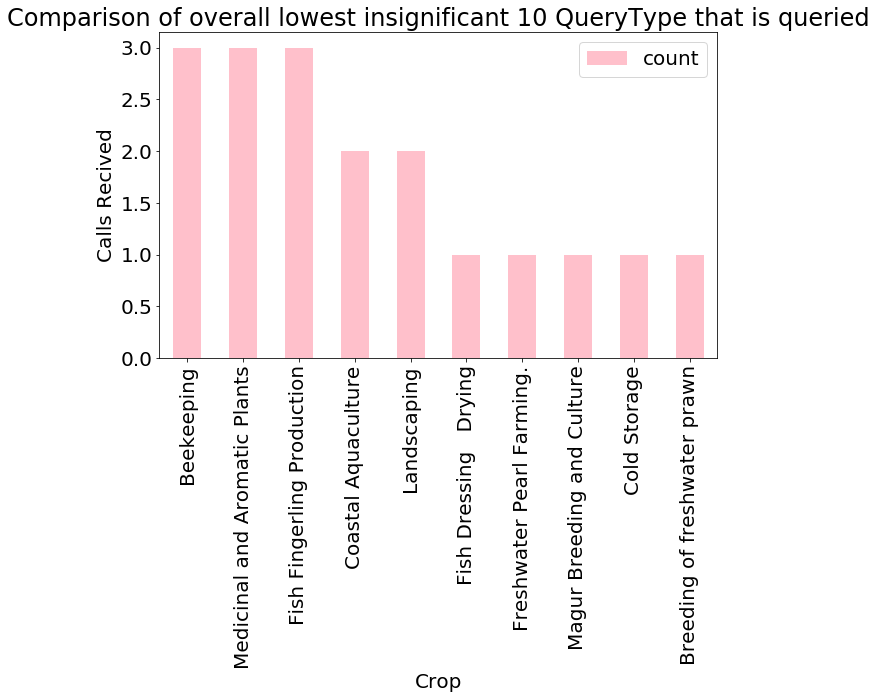

In [29]:
qr.tail(10).plot.bar(x='QueryType',figsize=(10, 6), rot=90,color="pink") 

plt.ylabel('Calls Recived')
plt.xlabel('Crop')
plt.title('Comparison of overall lowest insignificant 10 QueryType that is queried')
#plt.annotate(" UNIQUE",xy=(3,450),xytext=(4,400),arrowprops=dict(arrowstyle="<-"))
plt.show()


### OVERALL LEAST SIGNIFICANT QUIRIES ARE RELATED TO FISHERY 

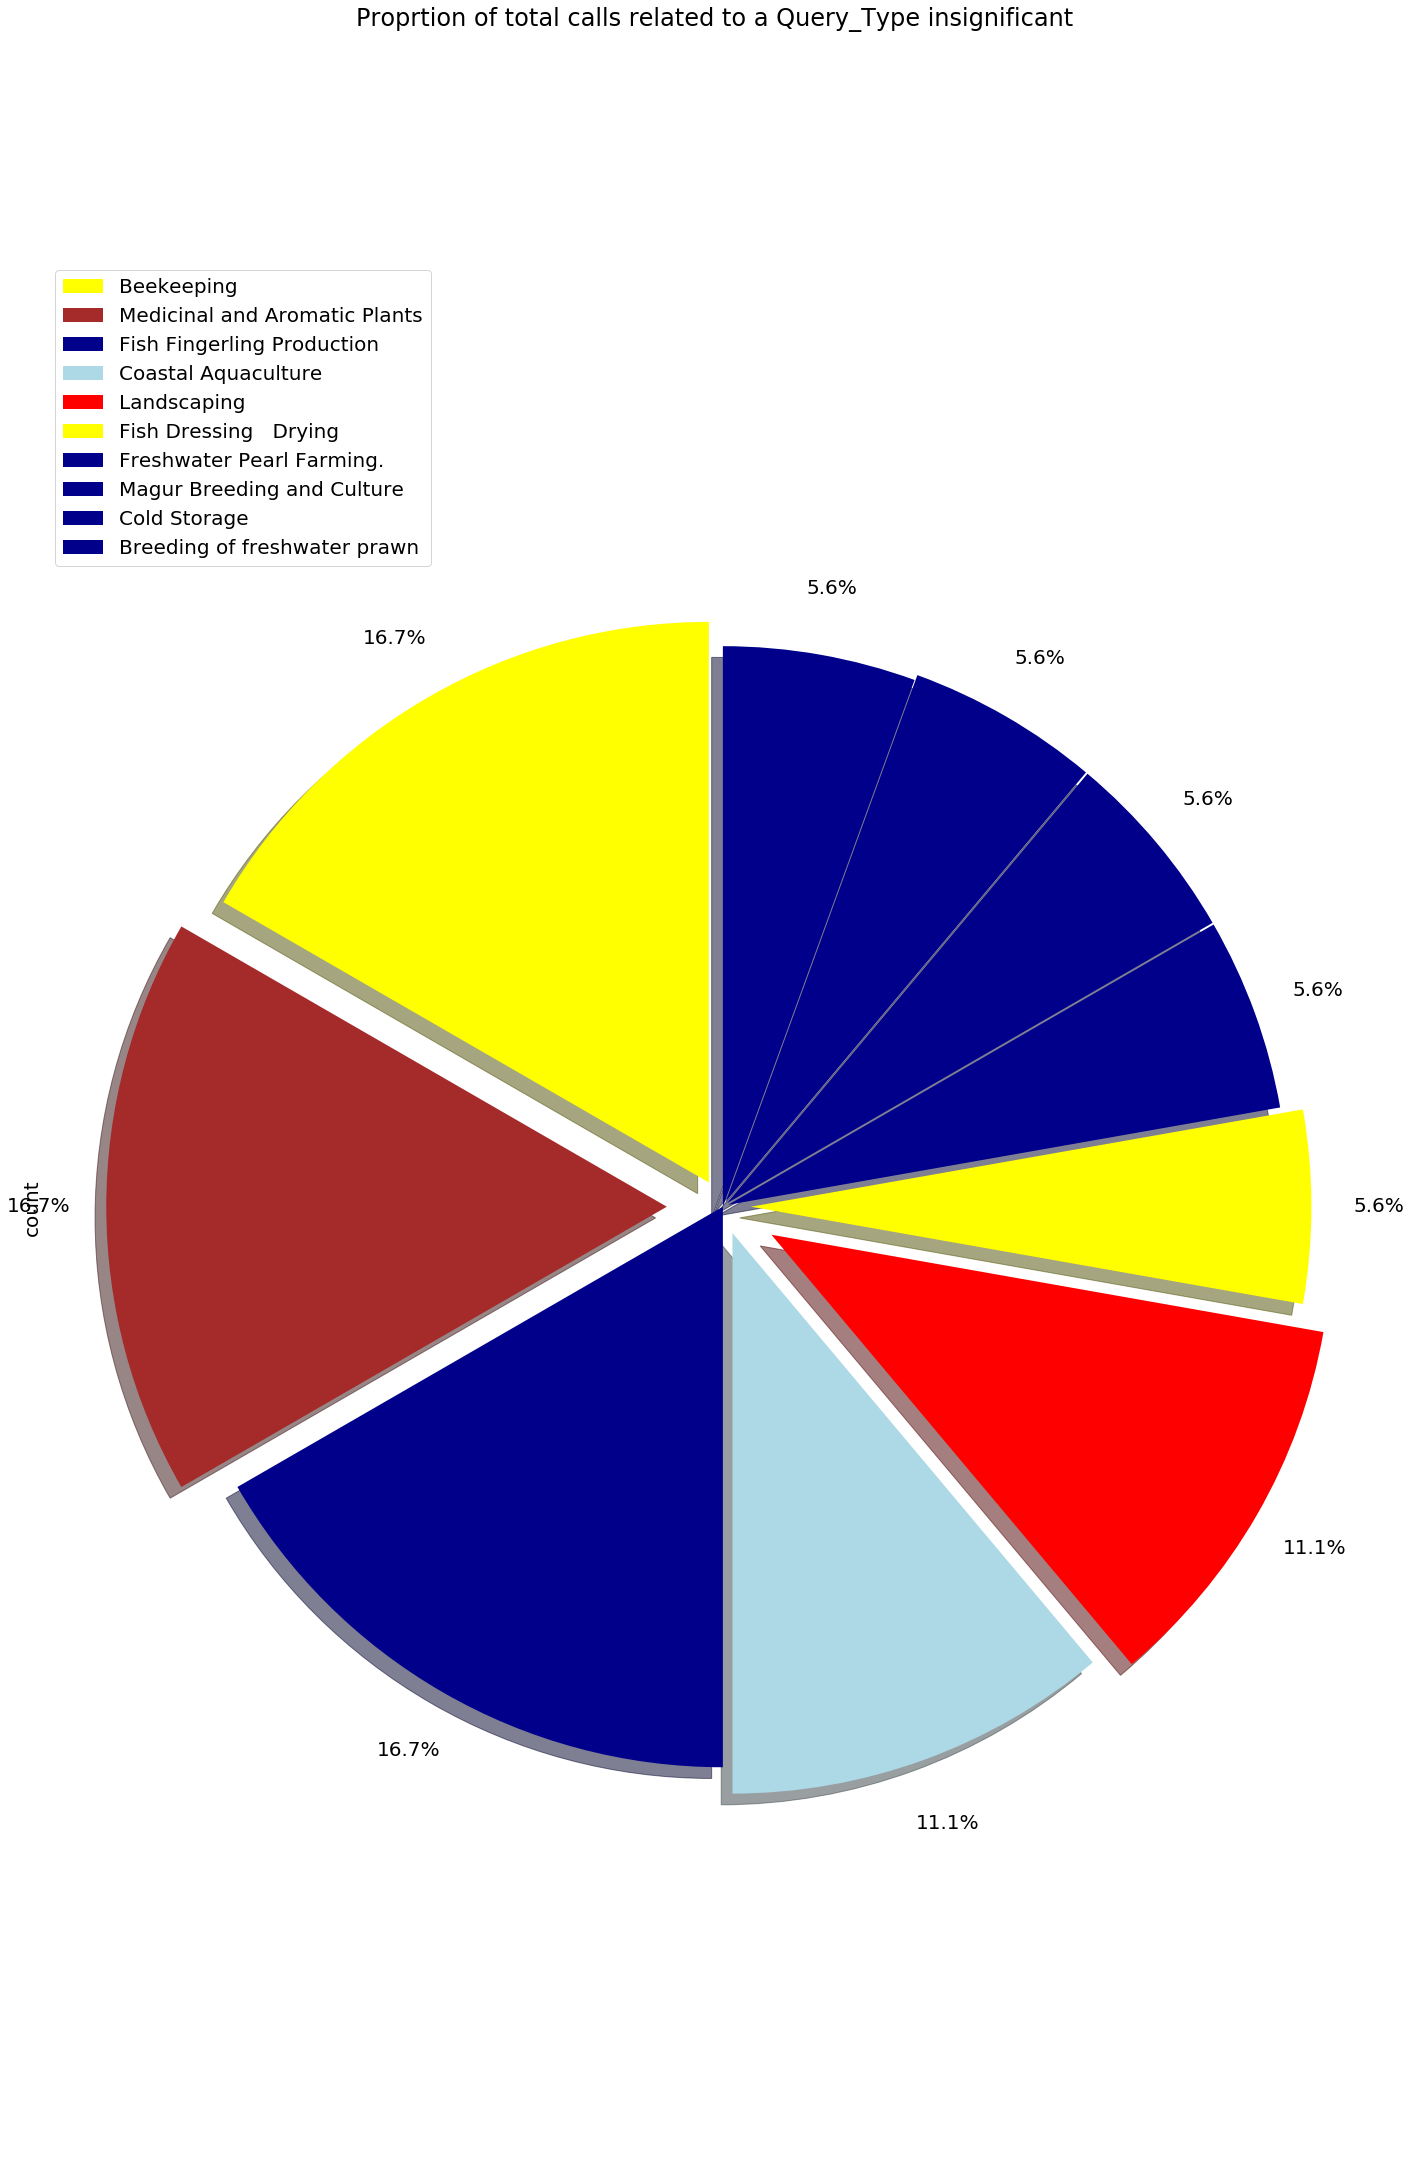

In [30]:

colors_list = ['yellow', 'brown', 'darkblue','lightblue','red','yellow','darkblue','darkblue','darkblue','darkblue']
explode_list = [0.05,0.1,0,0.05,0.1,0.05,0.01,0.01,0.01,0]
                # ratio for each continent with which to offset each wedge.

qr['count'].tail(10).plot(kind='pie',
                            figsize=(20,30),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                           colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Proprtion of total calls related to a Query_Type insignificant',y=1.12) 

plt.axis('equal') 
plt.tight_layout()
# add legend
plt.legend(labels=qr["QueryType"].tail(10), loc='upper left',prop={'size':20})

plt.show()

### MOSTLY QUERYTYPE ARE REALTED TO AQUACULTURE,FISHERY RELATED  ARE MARKED IN DARKBLUE AND COSTAL REALTED IN LIGHT BLUE REST ARE RELATED TO ORNAMENTAL FEATURES 

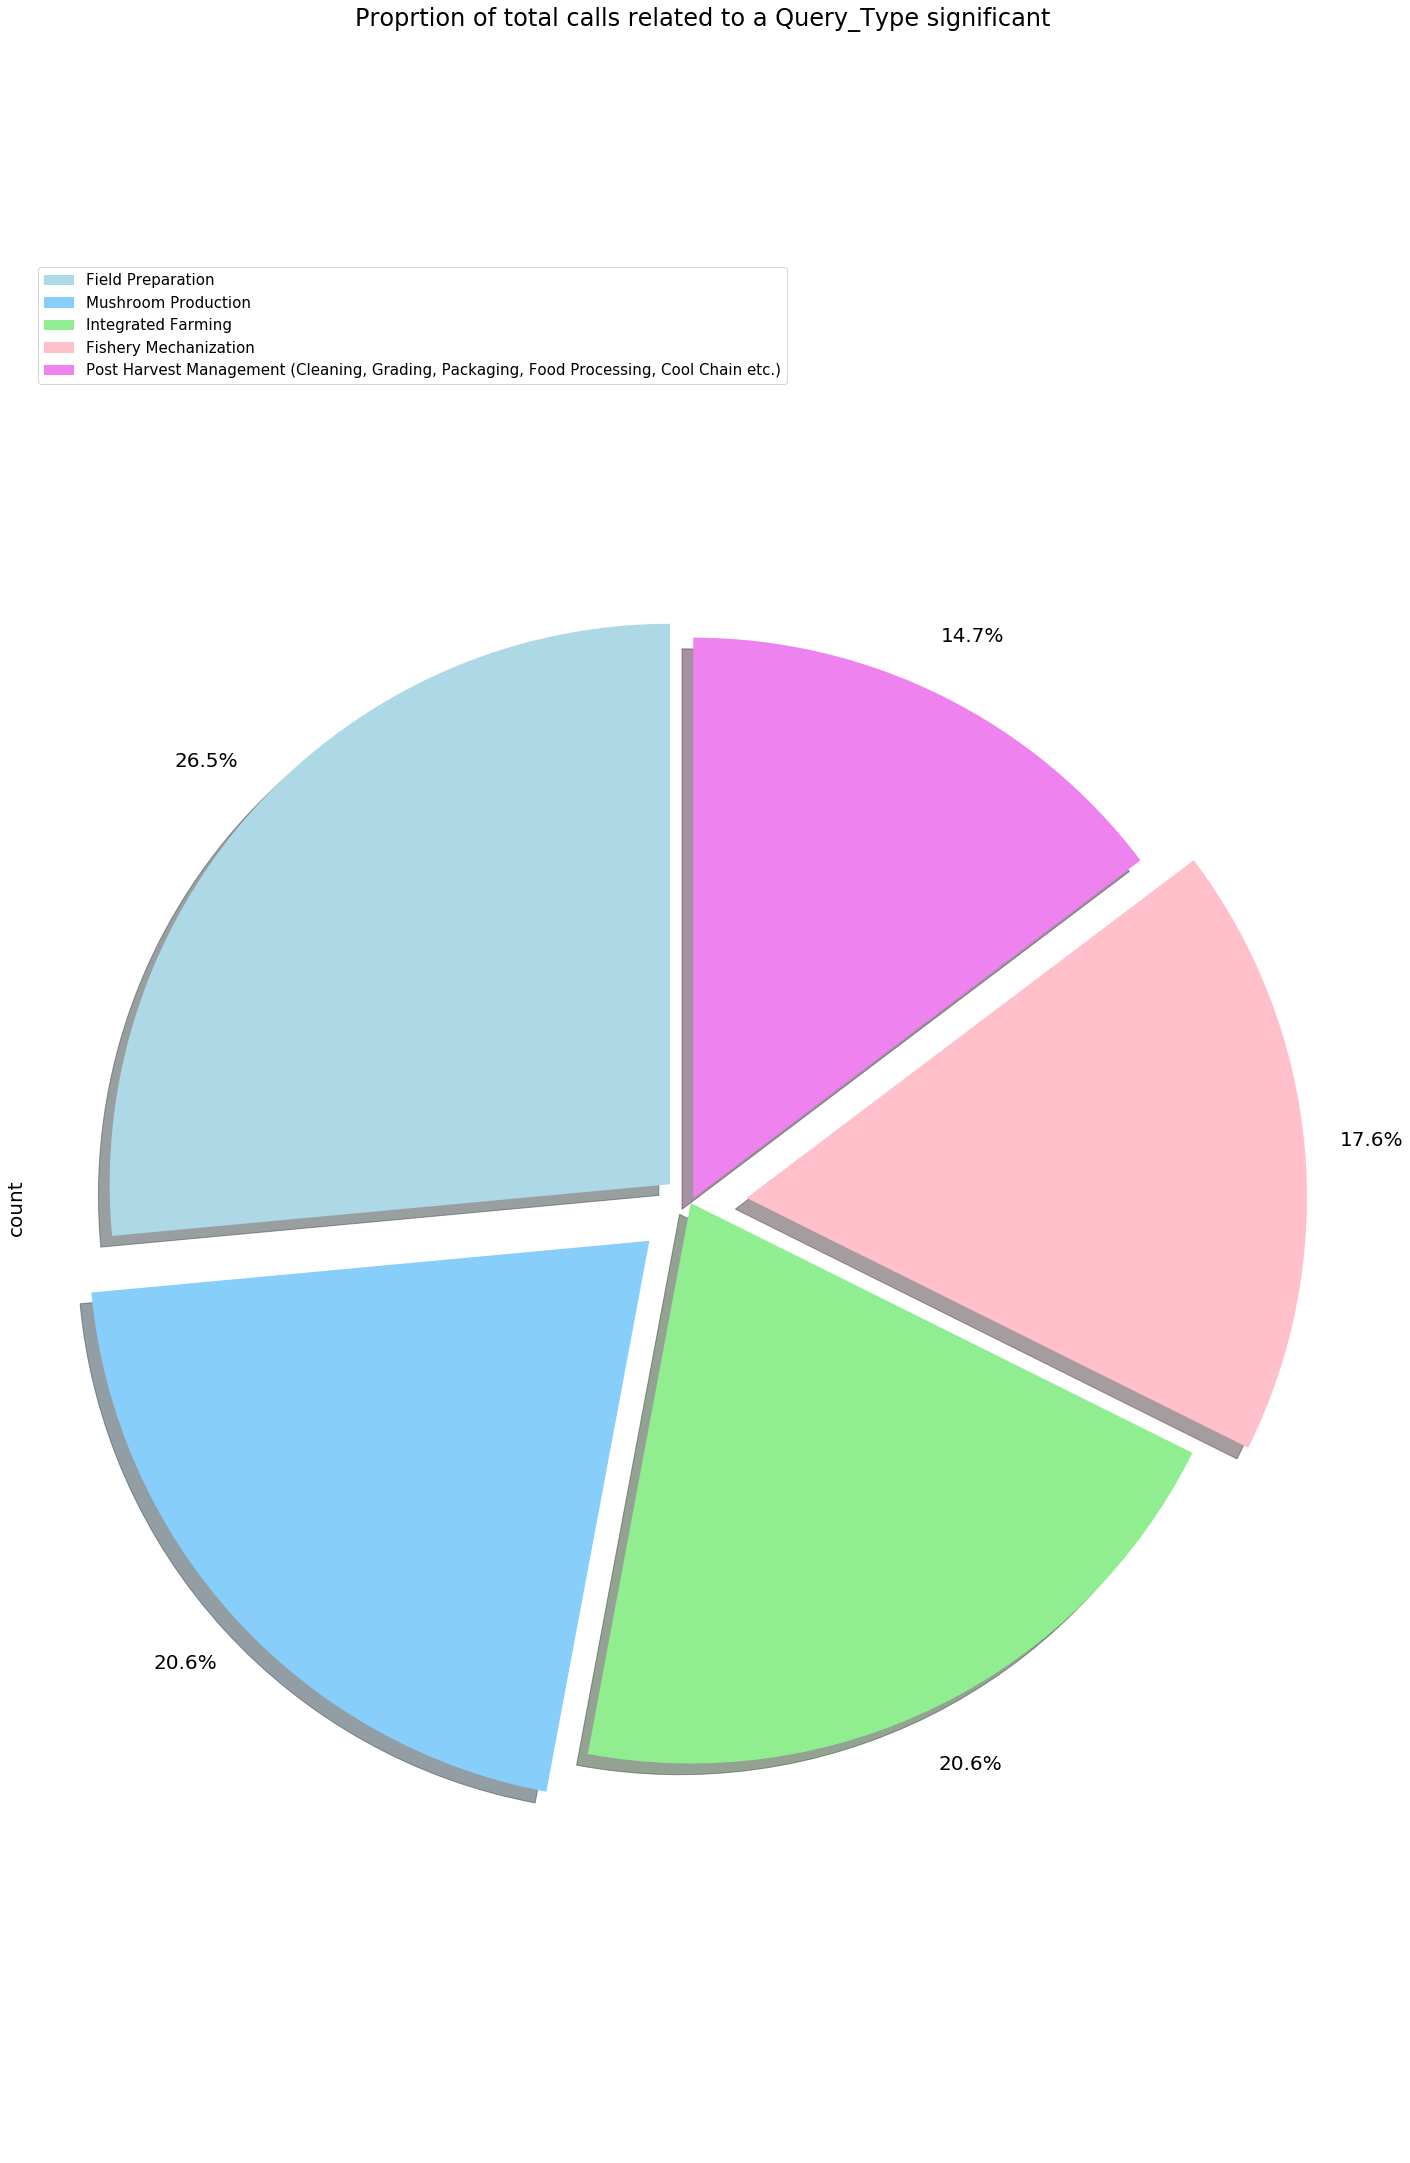

In [31]:
colors_list = ['lightblue', 'lightskyblue', 'lightgreen', 'pink','violet']
explode_list = [0.05,0.1,0,0.1,0.01]
                # ratio for each continent with which to offset each wedge.

df_qr['count'].tail(5).plot(kind='pie',
                            figsize=(20,30),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                           colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Proprtion of total calls related to a Query_Type significant', y=1.12) 

plt.axis('equal') 
plt.tight_layout()
# add legend
plt.legend(labels=df_qr["QueryType"].tail(10), loc='upper left',prop={'size':15})

plt.show()

In [32]:
hr = df[df["StateName"].str.contains("HARYANA")]

gj = df[df["StateName"].str.contains("GUJARAT")]

up = df[df["StateName"].str.contains("UTTAR PRADESH")]

rj =df[df["StateName"].str.contains("RAJASTHAN")]

jk = df[df["StateName"].str.contains("JAMMU AND KASHMIR")]

tn = df[df["StateName"].str.contains("TAMILNADU")]

In [33]:
hr_s = hr["Sector"].value_counts().to_frame()

hr_s = hr["Sector"].value_counts().to_frame()
hr_s.reset_index(inplace=True)
hr_s.rename(columns={'index':'Sector','Sector':'count'},inplace=True)
hr_s.index.astype('object')
hr_s.set_index('Sector')
hr_s["count"]=((hr_s['count']-hr_s['count'].min())/(hr_s['count'].max()-hr_s['count'].min()))*1000

In [34]:
gj_s = gj["Sector"].value_counts().to_frame()
gj_s.reset_index(inplace=True)
gj_s.rename(columns={'index':'Sector','Sector':'count'},inplace=True)
gj_s.index.astype('object')
gj_s.set_index('Sector')
gj_s["count"]=((gj_s['count']-gj_s['count'].min())/(gj_s['count'].max()-gj_s['count'].min()))*1000

In [35]:
up_s = up["Sector"].value_counts().to_frame()
up_s.reset_index(inplace=True)
up_s.rename(columns={'index':'Sector','Sector':'count'},inplace=True)
up_s.index.astype('object')
up_s.set_index('Sector')
up_s["count"]=((up_s['count']-up_s['count'].min())/(up_s['count'].max()-up_s['count'].min()))*1000

In [36]:
rj_s = rj["Sector"].value_counts().to_frame()
rj_s.reset_index(inplace=True)
rj_s.rename(columns={'index':'Sector','Sector':'count'},inplace=True)
rj_s.index.astype('object')
rj_s.set_index('Sector')
rj_s["count"]=((rj_s['count']-rj_s['count'].min())/(rj_s['count'].max()-rj_s['count'].min()))*1000

In [37]:
jk_s = jk["Sector"].value_counts().to_frame()
jk_s.reset_index(inplace=True)
jk_s.rename(columns={'index':'Sector','Sector':'count'},inplace=True)
jk_s.index.astype('object')
jk_s.set_index('Sector')
jk_s["count"]=((jk_s['count']-jk_s['count'].min())/(jk_s['count'].max()-jk_s['count'].min()))*1000

In [38]:
tn_s = tn["Sector"].value_counts().to_frame()
tn_s.reset_index(inplace=True)
tn_s.rename(columns={'index':'Sector','Sector':'count'},inplace=True)
tn_s.index.astype('object')
tn_s.set_index('Sector')
tn_s["count"]=((tn_s['count']-tn_s['count'].min())/(tn_s['count'].max()-tn_s['count'].min()))*1000

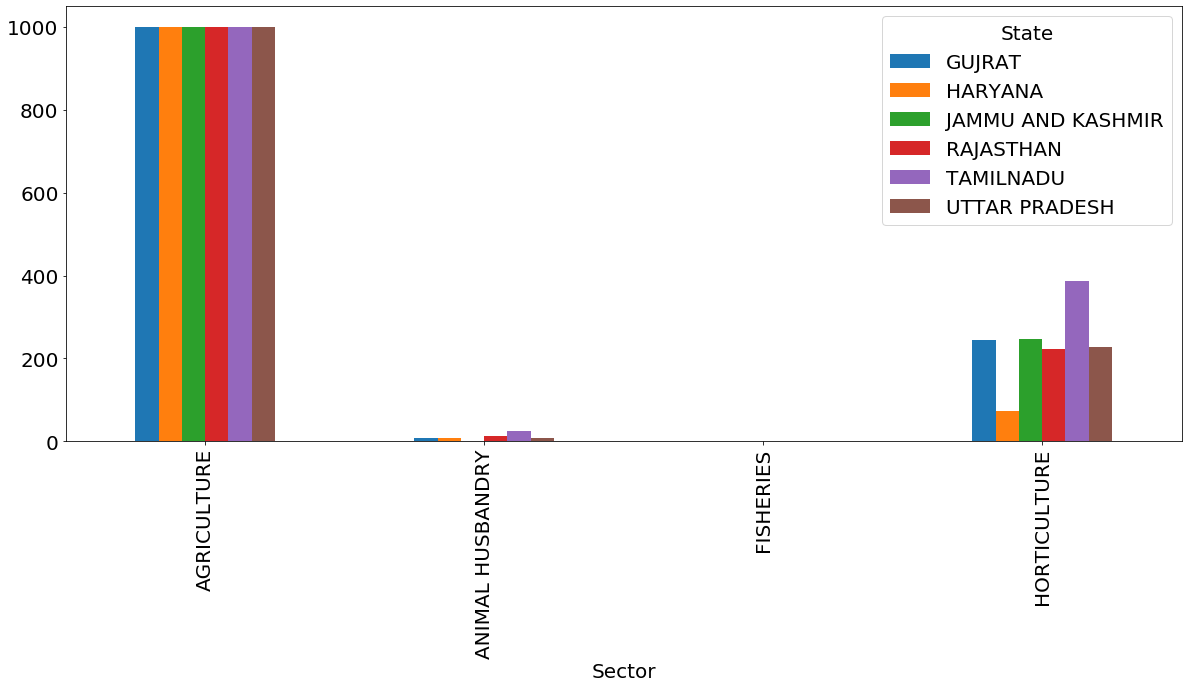

In [39]:
tr1 =pd.concat([hr_s,rj_s,up_s,jk_s,gj_s,tn_s],axis=0,ignore_index=False)
columns=['HARYANA','HARYANA','HARYANA','HARYANA','UTTAR PRADESH','UTTAR PRADESH','UTTAR PRADESH','UTTAR PRADESH','RAJASTHAN','RAJASTHAN','RAJASTHAN','RAJASTHAN','JAMMU AND KASHMIR','JAMMU AND KASHMIR','JAMMU AND KASHMIR','GUJRAT','GUJRAT','GUJRAT','GUJRAT','TAMILNADU','TAMILNADU','TAMILNADU','TAMILNADU']
tr1.insert(2,"State",columns)

tr1
tr1.pivot(index='Sector', columns='State', values='count').plot(kind='bar',figsize=(20,8),rot=90)

#### IT CAN BE CLEARLY SEEN HARYANA QUIRY ARE MOSTLY REALTED TO AGRICULTURE SECTOR ONLY NEGLECTING ALL OTHER SECTOR
#### TAMIL NADU HAVE HIGH QUIRES FOR EVERY SECTOR AS COMPARED TO OTHER STATES

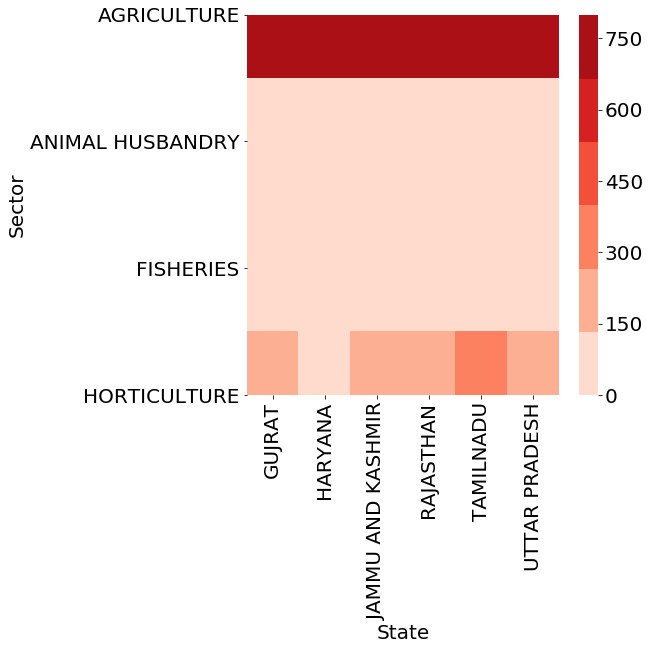

In [40]:
pivot_table = tr1.pivot("Sector", "State", "count")

pivot_table

pivot_table.replace(np.nan,0,inplace=True)

pivot_table

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(data=pivot_table, 
            cmap=sns.color_palette("Reds"),
            ax=ax,vmin=0.0, vmax=800)
plt.show()

#### HORTICULTURE HAVE A GOOD VARIATION ALONG THE STATES AGRICULTURE BEING SAME IN ALL

In [41]:
hr_sec = hr["Category"].value_counts().to_frame()

In [42]:
hr_cat = hr["Category"].value_counts().to_frame()
hr_cat.reset_index(inplace=True)
hr_cat.rename(columns={'index':'Sector','Category':'count'},inplace=True)
hr_cat.index.astype('object')
hr_cat.set_index('Sector')
hr_cat["count"]=((hr_cat['count']-hr_cat['count'].min())/(hr_cat['count'].max()-hr_cat['count'].min()))*2000

In [43]:
hr_cat["count"]=((hr_cat['count']-hr_cat['count'].min())/(hr_cat['count'].max()-hr_cat['count'].min()))*1000

In [44]:
up_cat = up["Category"].value_counts().to_frame()
up_cat.reset_index(inplace=True)
up_cat.rename(columns={'index':'Sector','Category':'count'},inplace=True)
up_cat.index.astype('object')
up_cat.set_index('Sector')
up_cat["count"]=((up_cat['count']-up_cat['count'].min())/(up_cat['count'].max()-up_cat['count'].min()))*1000

In [45]:
rj_cat = rj["Category"].value_counts().to_frame()
rj_cat.reset_index(inplace=True)
rj_cat.rename(columns={'index':'Sector','Category':'count'},inplace=True)
rj_cat.index.astype('object')
rj_cat.set_index('Sector')
rj_cat["count"]=((rj_cat['count']-rj_cat['count'].min())/(rj_cat['count'].max()-rj_cat['count'].min()))*1000

In [46]:
gj_cat = gj["Category"].value_counts().to_frame()
gj_cat.reset_index(inplace=True)
gj_cat.rename(columns={'index':'Sector','Category':'count'},inplace=True)
gj_cat.index.astype('object')
gj_cat.set_index('Sector')
gj_cat["count"]=((gj_cat['count']-gj_cat['count'].min())/(gj_cat['count'].max()-gj_cat['count'].min()))*1000

In [47]:
tn_cat = tn["Category"].value_counts().to_frame()
tn_cat.reset_index(inplace=True)
tn_cat.rename(columns={'index':'Sector','Category':'count'},inplace=True)
tn_cat.index.astype('object')
tn_cat.set_index('Sector')
tn_cat["count"]=((tn_cat['count']-tn_cat['count'].min())/(tn_cat['count'].max()-tn_cat['count'].min()))*1000

In [48]:
jk_cat = jk["Category"].value_counts().to_frame()
jk_cat.reset_index(inplace=True)
jk_cat.rename(columns={'index':'Sector','Category':'count'},inplace=True)
jk_cat.index.astype('object')
jk_cat.set_index('Sector')
jk_cat["count"]=((jk_cat['count']-jk_cat['count'].min())/(jk_cat['count'].max()-jk_cat['count'].min()))*1000

In [49]:
hr_cat.drop(hr_cat.index[0],axis=0,inplace=True)

hr_cat_t=hr_cat.head(5)

hr_cat_l = hr_cat.tail(5)

up_cat.drop(up_cat.index[0],axis=0,inplace=True)
up_cat_t=up_cat.head(5)
up_cat_l = up_cat.tail(5)

jk_cat.drop(jk_cat.index[0],axis=0,inplace=True)
jk_cat_t=jk_cat.head(5)
jk_cat_l = jk_cat.tail(5)

rj_cat.drop(rj_cat.index[0],axis=0,inplace=True)
rj_cat_t=rj_cat.head(5)
rj_cat_l = rj_cat.tail(5)

tn_cat.drop(tn_cat.index[0],axis=0,inplace=True)
tn_cat_t=tn_cat.head(5)
tn_cat_l = tn_cat.tail(5)

gj_cat.drop(gj_cat.index[0],axis=0,inplace=True)
gj_cat_t=gj_cat.head(5)
gj_cat_l = gj_cat.tail(5)

hr_cat_t

,Sector,count
1,Cereals,216.189763
2,Vegetables,63.791813
3,Fruits,23.547700
4,Fiber Crops,14.105590
5,Fodder Crops,12.723818


In [50]:
cat = pd.concat([hr_cat_t,up_cat_t,rj_cat_t,jk_cat_t,gj_cat_t,tn_cat_t],axis=0,ignore_index=False)

cat_columns=['HARYANA','HARYANA','HARYANA','HARYANA','HARYANA','UP','UP','UP','UP','UP','RAJASTHAN','RAJASTHAN','RAJASTHAN','RAJASTHAN','RAJASTHAN','JAMMU AND KASHMIR','JAMMU AND KASHMIR','JAMMU AND KASHMIR','JAMMU AND KASHMIR','JAMMU AND KASHMIR','GUJRAT','GUJRAT','GUJRAT','GUJRAT','GUJRAT','TAMILNADU','TAMILNADU','TAMILNADU','TAMILNADU','TAMILNADU']

cat.insert(2,"State",cat_columns)
mpl.rcParams['font.size'] = 19.0
cat.head()

,Sector,count,State
1,Cereals,216.189763,HARYANA
2,Vegetables,63.791813,HARYANA
3,Fruits,23.547700,HARYANA
4,Fiber Crops,14.105590,HARYANA
5,Fodder Crops,12.723818,HARYANA


Text(0, 0.5, 'QUERIES')

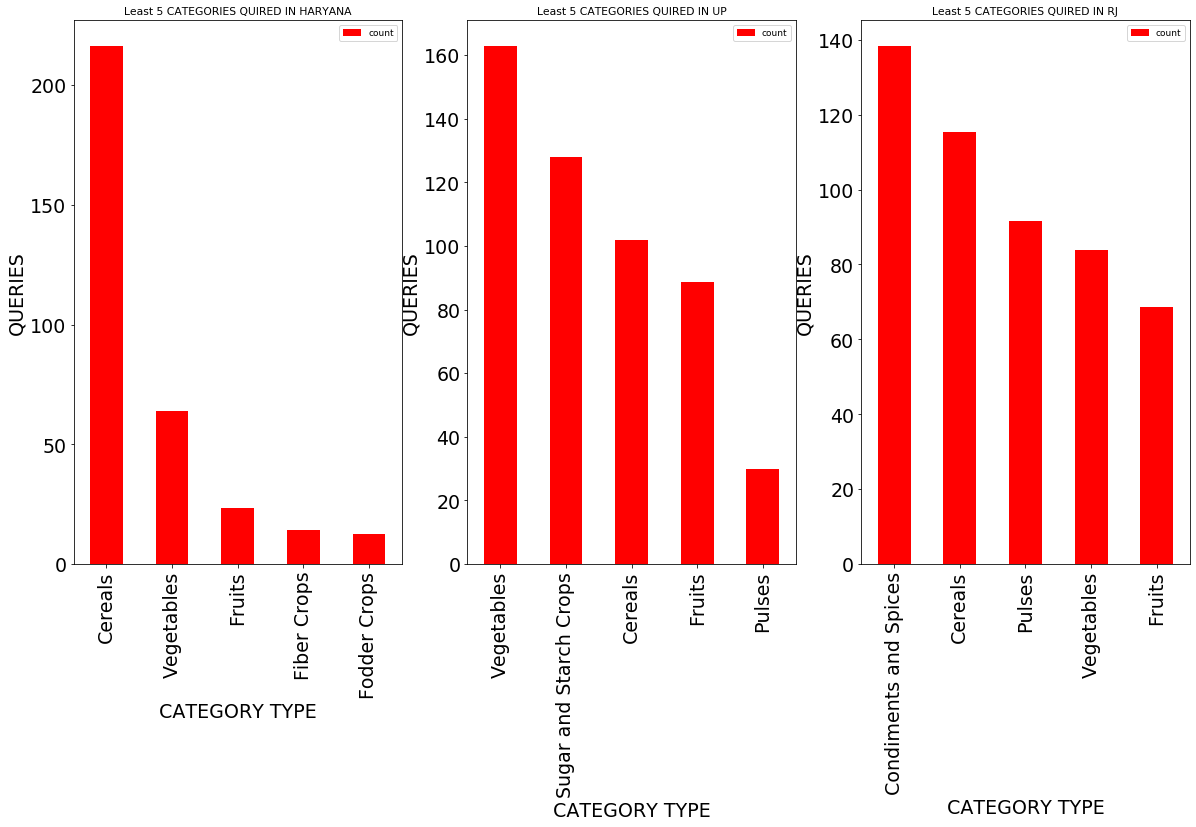

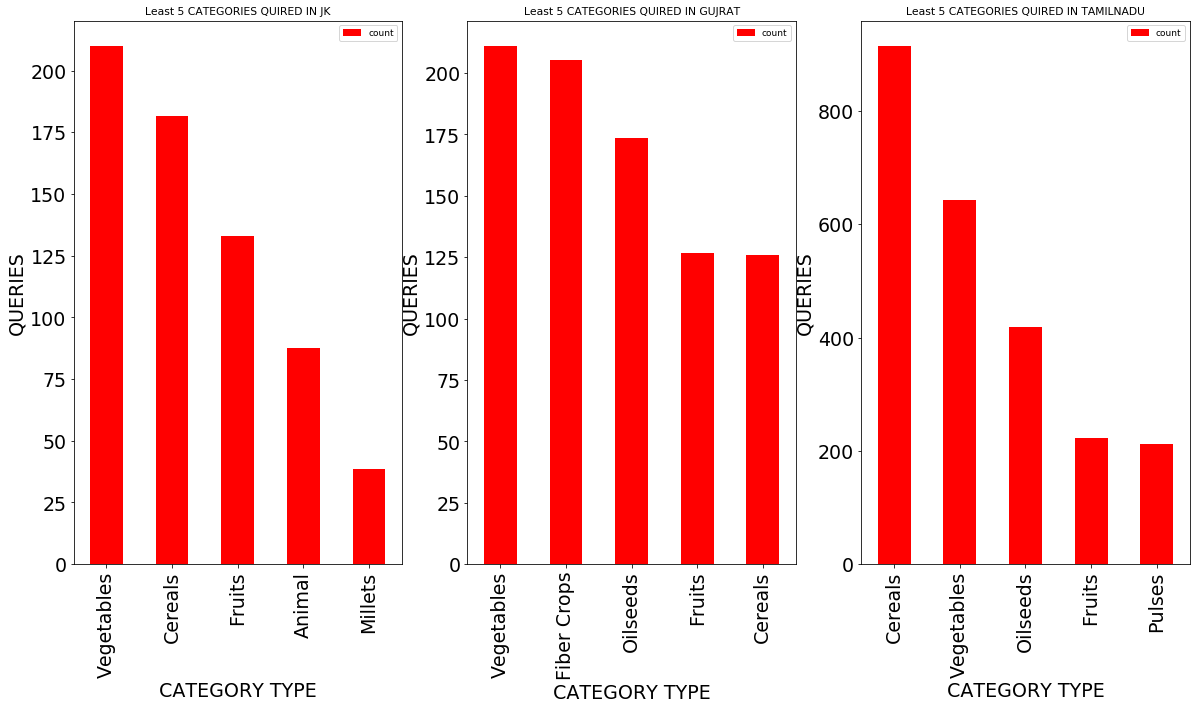

In [51]:
import matplotlib as mpl
fig = plt.figure()
fig1 = plt.figure() 
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 
ax3 = fig1.add_subplot(1, 3, 1) 
ax4 = fig1.add_subplot(1, 3, 2) 
ax5 = fig1.add_subplot(1, 3, 3) 
mpl.rcParams['font.size'] = 9.0
# Subplot 1: BAR plot
hr_cat_t.plot(kind='bar',x='Sector', color='red', figsize=(20, 10), ax=ax0) # add to subplot 1
ax0.set_title('Least 5 CATEGORIES QUIRED IN HARYANA')
ax0.set_xlabel('CATEGORY TYPE')
ax0.set_ylabel('QUERIES')
# Subplot 2: BAR plot
up_cat_t.plot(kind='bar',x='Sector', color='red', figsize=(20, 10), ax=ax1) # add to subplot 1
ax1.set_title('Least 5 CATEGORIES QUIRED IN UP')
ax1.set_xlabel('CATEGORY TYPE')
ax1.set_ylabel('QUERIES')
# Subplot 3: BAR plot
rj_cat_t.plot(kind='bar',x='Sector', color='red', figsize=(20, 10), ax=ax2) # add to subplot 1
ax2.set_title('Least 5 CATEGORIES QUIRED IN RJ')
ax2.set_xlabel('CATEGORY TYPE')
ax2.set_ylabel('QUERIES')
# Subplot 4: BAR plot
jk_cat_t.plot(kind='bar',x='Sector', color='red', figsize=(20, 10), ax=ax3) # add to subplot 1
ax3.set_title('Least 5 CATEGORIES QUIRED IN JK')
ax3.set_xlabel('CATEGORY TYPE')
ax3.set_ylabel('QUERIES')
# Subplot 5: BAR plot
gj_cat_t.plot(kind='bar',x='Sector', color='red', figsize=(20, 10), ax=ax4) # add to subplot 1
ax4.set_title('Least 5 CATEGORIES QUIRED IN GUJRAT')
ax4.set_xlabel('CATEGORY TYPE')
ax4.set_ylabel('QUERIES')
# Subplot 6: BAR plot
tn_cat_t.plot(kind='bar',x='Sector', color='red', figsize=(20, 10), ax=ax5) # add to subplot 1
ax5.set_title('Least 5 CATEGORIES QUIRED IN TAMILNADU')
ax5.set_xlabel('CATEGORY TYPE')
ax5.set_ylabel('QUERIES')

#### JAMMU N KASHMIR HAVE ANIMAL RELATED QUIRES WHICH IS AN EXCEPTION AS COMPARED TO REST OF STATES AND HARYANA HAVING FODDER CROP AS AN EXCEPTION. 

Text(0, 0.5, 'QUERIES')

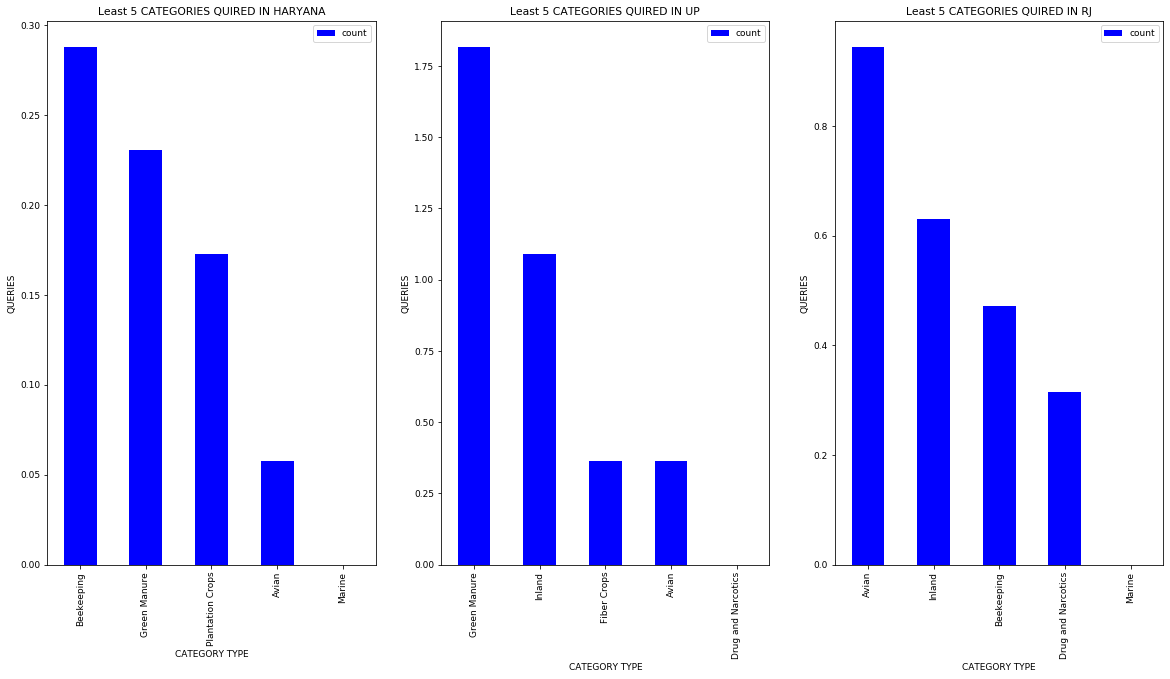

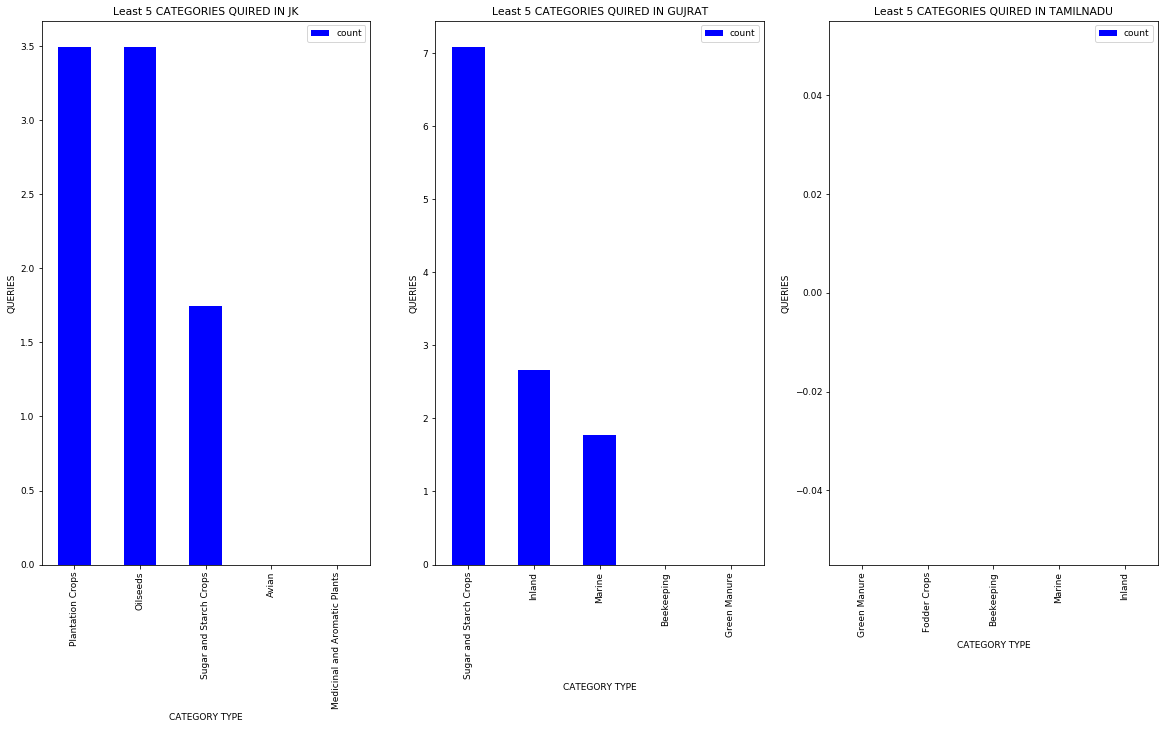

In [52]:
fig = plt.figure()
fig1 = plt.figure() 
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 
ax3 = fig1.add_subplot(1, 3, 1) 
ax4 = fig1.add_subplot(1, 3, 2) 
ax5 = fig1.add_subplot(1, 3, 3) 

# Subplot 1: BAR plot
hr_cat_l.plot(kind='bar',x='Sector', color='blue', figsize=(20, 10), ax=ax0) # add to subplot 1
ax0.set_title('Least 5 CATEGORIES QUIRED IN HARYANA')
ax0.set_xlabel('CATEGORY TYPE')
ax0.set_ylabel('QUERIES')
# Subplot 2: BAR plot
up_cat_l.plot(kind='bar',x='Sector', color='blue', figsize=(20, 10), ax=ax1) # add to subplot 1
ax1.set_title('Least 5 CATEGORIES QUIRED IN UP')
ax1.set_xlabel('CATEGORY TYPE')
ax1.set_ylabel('QUERIES')
# Subplot 3: BAR plot
rj_cat_l.plot(kind='bar',x='Sector', color='blue', figsize=(20, 10), ax=ax2) # add to subplot 1
ax2.set_title('Least 5 CATEGORIES QUIRED IN RJ')
ax2.set_xlabel('CATEGORY TYPE')
ax2.set_ylabel('QUERIES')
# Subplot 4: BAR plot
jk_cat_l.plot(kind='bar',x='Sector', color='blue', figsize=(20, 10), ax=ax3) # add to subplot 1
ax3.set_title('Least 5 CATEGORIES QUIRED IN JK')
ax3.set_xlabel('CATEGORY TYPE')
ax3.set_ylabel('QUERIES')
# Subplot 5: BAR plot
gj_cat_l.plot(kind='bar',x='Sector', color='blue', figsize=(20, 10), ax=ax4) # add to subplot 1
ax4.set_title('Least 5 CATEGORIES QUIRED IN GUJRAT')
ax4.set_xlabel('CATEGORY TYPE')
ax4.set_ylabel('QUERIES')
# Subplot 6: BAR plot
tn_cat_l.plot(kind='bar',x='Sector', color='blue', figsize=(20, 10), ax=ax5) # add to subplot 1
ax5.set_title('Least 5 CATEGORIES QUIRED IN TAMILNADU')
ax5.set_xlabel('CATEGORY TYPE')
ax5.set_ylabel('QUERIES')

In [53]:
hr_crpq = hr["QueryType"].value_counts().to_frame()
hr_crpq.reset_index(inplace=True)
hr_crpq.rename(columns={'index':'QueryType','QueryType':'count'},inplace=True)
hr_crpq.index.astype('object')
hr_crpq.set_index('QueryType')
#hr_crpq["count"]=((hr_crpq['count']-hr_crpq['count'].min())/(hr_crpq['count'].max()-hr_crpq['count'].min()))*1000
gj_crpq = gj["QueryType"].value_counts().to_frame()
gj_crpq.reset_index(inplace=True)
gj_crpq.rename(columns={'index':'QueryType','QueryType':'count'},inplace=True)
gj_crpq.index.astype('object')
gj_crpq.set_index('QueryType')
#gj_crpq["count"]=((gj_crpq['count']-gj_crpq['count'].min())/(gj_crpq['count'].max()-gj_crpq['count'].min()))*1000
up_crpq = up["QueryType"].value_counts().to_frame()
up_crpq.reset_index(inplace=True)
up_crpq.rename(columns={'index':'QueryType','QueryType':'count'},inplace=True)
up_crpq.index.astype('object')
up_crpq.set_index('QueryType')
#mh_crpq["count"]=((mh_crpq['count']-mh_crpq['count'].min())/(mh_crpq['count'].max()-mh_crpq['count'].min()))*1000
jk_crpq = jk["QueryType"].value_counts().to_frame()
jk_crpq.reset_index(inplace=True)
jk_crpq.rename(columns={'index':'QueryType','QueryType':'count'},inplace=True)
jk_crpq.index.astype('object')
jk_crpq.set_index('QueryType')
#jk_crpq["count"]=((jk_crpq['count']-jk_crpq['count'].min())/(jk_crpq['count'].max()-jk_crpq['count'].min()))*1000
rj_crpq = rj["QueryType"].value_counts().to_frame()
rj_crpq.reset_index(inplace=True)
rj_crpq.rename(columns={'index':'QueryType','QueryType':'count'},inplace=True)
rj_crpq.index.astype('object')
rj_crpq.set_index('QueryType')
#asa_crpq["count"]=((asa_crpq['count']-asa_crpq['count'].min())/(asa_crpq['count'].max()-asa_crpq['count'].min()))*1000
tn_crpq = tn["QueryType"].value_counts().to_frame()
tn_crpq.reset_index(inplace=True)
tn_crpq.rename(columns={'index':'QueryType','QueryType':'count'},inplace=True)
tn_crpq.index.astype('object')
tn_crpq.set_index('QueryType')
#tn_crpq["count"]=((tn_crpq['count']-tn_crpq['count'].min())/(tn_crpq['count'].max()-tn_crpq['count'].min()))*1000

#hr_crpq.drop(hr_crpq.index[0],axis=0,inplace=True)
hr_crpq_t=hr_crpq.head(5)
#jk_crpq.drop(jk_crpq.index[0],axis=0,inplace=True)
jk_crpq_t=jk_crpq.head(5)
#asa_crpq.drop(asa_crpq.index[0],axis=0,inplace=True)
rj_crpq_t=rj_crpq.head(5)
#gj_crpq.drop(gj_crpq.index[0],axis=0,inplace=True)
gj_crpq_t=gj_crpq.head(5)
#mh_crpq.drop(mh_crpq.index[0],axis=0,inplace=True)
up_crpq_t=up_crpq.head(5)
#tn_crpq.drop(tn_crpq.index[0],axis=0,inplace=True)
tn_crpq_t=tn_crpq.head(5)

Text(0, 0.5, 'QUERIES')

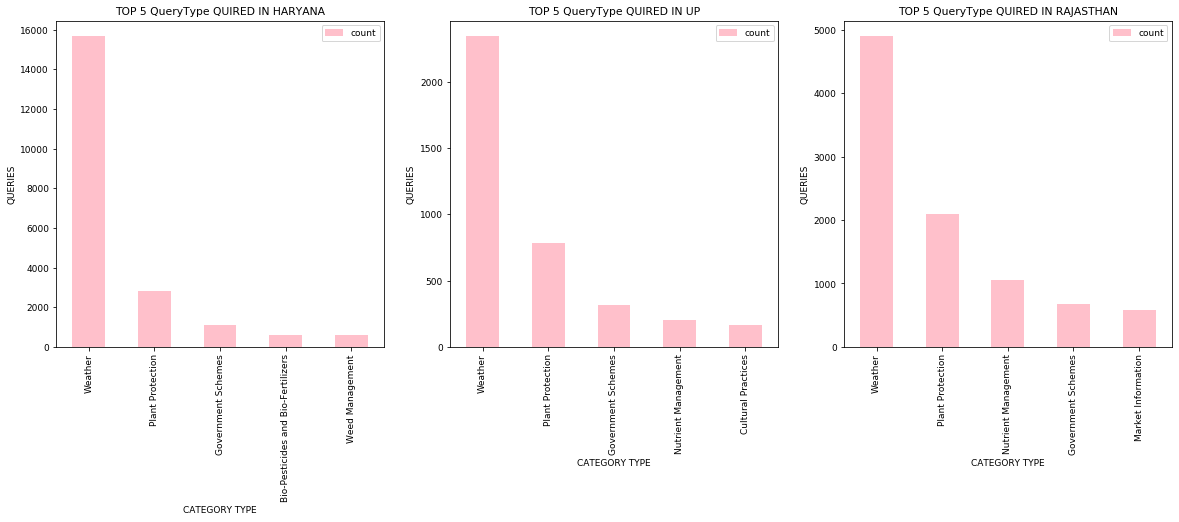

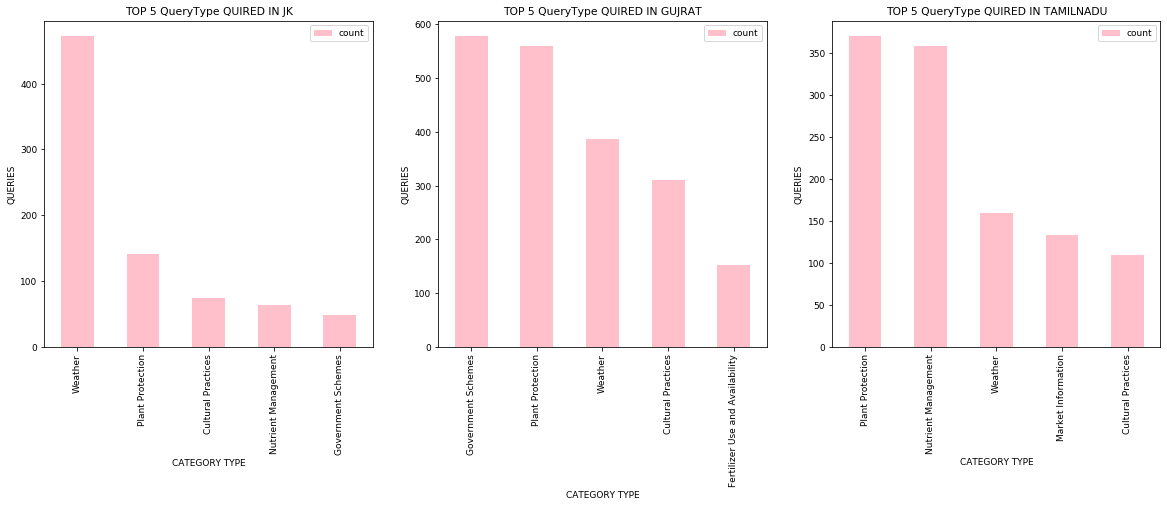

In [54]:
fig = plt.figure()
fig1 = plt.figure() 
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 
ax3 = fig1.add_subplot(1, 3, 1) 
ax4 = fig1.add_subplot(1, 3, 2) 
ax5 = fig1.add_subplot(1, 3, 3) 

# Subplot 1: BAR plot
hr_crpq_t.plot(kind='bar',x='QueryType', color='pink', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('TOP 5 QueryType QUIRED IN HARYANA')
ax0.set_xlabel('CATEGORY TYPE')
ax0.set_ylabel('QUERIES')
# Subplot 2: BAR plot
up_crpq_t.plot(kind='bar',x='QueryType', color='pink', figsize=(20, 6), ax=ax1) # add to subplot 1
ax1.set_title('TOP 5 QueryType QUIRED IN UP')
ax1.set_xlabel('CATEGORY TYPE')
ax1.set_ylabel('QUERIES')
# Subplot 3: BAR plot
rj_crpq_t.plot(kind='bar',x='QueryType', color='pink', figsize=(20, 6), ax=ax2) # add to subplot 1
ax2.set_title('TOP 5 QueryType QUIRED IN RAJASTHAN')
ax2.set_xlabel('CATEGORY TYPE')
ax2.set_ylabel('QUERIES')
# Subplot 4: BAR plot
jk_crpq_t.plot(kind='bar',x='QueryType', color='pink', figsize=(20, 6), ax=ax3) # add to subplot 1
ax3.set_title('TOP 5 QueryType QUIRED IN JK')
ax3.set_xlabel('CATEGORY TYPE')
ax3.set_ylabel('QUERIES')
# Subplot 5: BAR plot
gj_crpq_t.plot(kind='bar',x='QueryType', color='pink', figsize=(20, 6), ax=ax4) # add to subplot 1
ax4.set_title('TOP 5 QueryType QUIRED IN GUJRAT')
ax4.set_xlabel('CATEGORY TYPE')
ax4.set_ylabel('QUERIES')
# Subplot 6: BAR plot
tn_crpq_t.plot(kind='bar',x='QueryType', color='pink', figsize=(20, 6), ax=ax5) # add to subplot 1
ax5.set_title('TOP 5 QueryType QUIRED IN TAMILNADU')
ax5.set_xlabel('CATEGORY TYPE')
ax5.set_ylabel('QUERIES')

#### GUJRAT CAN BE SEEN AS AN EXCEPTION AS GOVT SCHEMES REALTED QUIRES IS MAX QUIRED WHICH IS FAR MORE THAN ANY OTHER STATE. 

# Data Reduction

## PCA

In [55]:
category =pd.get_dummies(df.Category)
sector= pd.get_dummies(df.Sector)
crop=pd.get_dummies(df.Crop)
district = pd.get_dummies(df.DistrictName)
state=pd.get_dummies(df.StateName)
block=pd.get_dummies(df.BlockName)
month=pd.get_dummies(df.Month)
Query = pd.get_dummies(df.QueryType)

sqmerge = pd.concat([district,crop,sector,block,state,month,category],axis=1)

features = list(sqmerge.columns)

sqmerge


,AHMADABAD,AJMER,ALLAHABAD,AMBALA,BHARUCH,BIKANER,CHITRAKOOT,CHITTAURGARH,CUDDALORE,GHAZIABAD,...,Inland,Marine,Medicinal and Aromatic Plants,Millets,Oilseeds,Others,Plantation Crops,Pulses,Sugar and Starch Crops,Vegetables
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
43947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
43948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
43949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
x = sqmerge.loc[:, features].values

x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [57]:
y = df.loc[:,['QueryType']].values #Taking Sector as our Target Attribute for PCA
y

array([['Weather'],
       ['Weather'],
       ['Weather'],
       ...,
       ['Government Schemes'],
       ['Nutrient Management'],
       ['Weather']], dtype=object)

In [58]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

Creating Co-Variance Matrix

In [59]:
X_std=x
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00002275 -0.01975376 -0.02382884 ...  0.0131613  -0.01169691
   0.01366646]
 [-0.01975376  1.00002275 -0.02259248 ...  0.01504298 -0.01484665
   0.04215319]
 [-0.02382884 -0.02259248  1.00002275 ...  0.01043725 -0.00517416
   0.07156599]
 ...
 [ 0.0131613   0.01504298  0.01043725 ...  1.00002275 -0.01830151
  -0.03949933]
 [-0.01169691 -0.01484665 -0.00517416 ... -0.01830151  1.00002275
  -0.03057893]
 [ 0.01366646  0.04215319  0.07156599 ... -0.03949933 -0.03057893
   1.00002275]]


Extracting EigenVector and EigenValues

In [60]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.35631479e-02+0.j         -1.81488930e-02+0.j
   2.78119724e-03+0.j         ... -5.68865337e-02-0.00466837j
  -5.68865337e-02+0.00466837j  6.43304522e-17+0.j        ]
 [-2.84653269e-02+0.j          2.33761509e-02+0.j
   7.49892372e-03+0.j         ...  1.57184720e-01+0.01858497j
   1.57184720e-01-0.01858497j -4.25895803e-16+0.j        ]
 [-2.45938674e-02+0.j          6.10064989e-03+0.j
  -9.15946166e-02+0.j         ... -5.83346384e-02-0.01731046j
  -5.83346384e-02+0.01731046j  7.49820234e-17+0.j        ]
 ...
 [-6.85551728e-02+0.j          4.46943644e-02+0.j
   9.55901482e-03+0.j         ... -4.03906442e-03+0.00058431j
  -4.03906442e-03-0.00058431j  4.19315372e-17+0.j        ]
 [-5.41760442e-02+0.j         -4.21775220e-02+0.j
  -2.18919584e-01+0.j         ... -2.36472225e-02-0.00161197j
  -2.36472225e-02+0.00161197j -8.72925231e-19+0.j        ]
 [-1.69538484e-01+0.j         -6.71129935e-02+0.j
   9.68005902e-03+0.j         ... -6.48049091e-03+0.00093749j
  -6.48049091e

Checking if all the Vectors have same unit

In [61]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

Sorting EigenValues 

In [62]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
ev=[]
for i in eig_pairs:
    ev.append(i[0])
    print(i[0])

Eigenvalues in descending order:
6.935411594111828
5.449383228779929
4.56198686860941
4.470825990680882
4.389799483256044
4.114637530730988
4.008814306067072
3.9452057092606667
3.6972476507273004
3.5575191017502648
3.302465157923628
3.164009129204628
3.0650375631913147
2.961890793173737
2.9016059956749296
2.8875348727926125
2.6992674477173857
2.619822644483111
2.5400116948613385
2.5333110951965647
2.401207465302976
2.2757927558502336
2.244513870187492
2.2084858466178017
2.1529770950907277
2.088660339381132
2.0757251526576317
2.055735459256625
2.0506100133746146
2.0395081178594157
2.031005332722745
2.025387359957995
2.0152710414916197
2.0100208010759117
2.0008542094847606
1.9798006610628218
1.9583477221673888
1.9143043107470101
1.8784340427287776
1.8176667709872734
1.770069603962985
1.761803988967766
1.7454412021515269
1.7282872757967989
1.7145235627550153
1.615511662554392
1.4836431500893228
1.3537491253875877
1.3110185155029181
1.2851039137594844
1.2758952909483148
1.2628389365699786


Projecting to new Dimension (ie.2) using a Transformation matrix (matrix_w)

In [63]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(len(eig_pairs),1), 
                      eig_pairs[1][1].reshape(len(eig_pairs),1)))

In [64]:
Y = X_std.dot(matrix_w) # Y = X*W
l1= []
l2=[]

as Y is a 490*2 matrix . So converting it to DataFrame for better Use.

In [65]:
for i in Y:
    l1.append(i[0].real)
    l2.append(i[1].real)
pc1 = pd.Series(l1)
pc2 = pd.Series(l2)
TotalComponents = pd.concat([pc1,pc2],axis=1)
PrincipalComponents = pd.DataFrame(TotalComponents)
PrincipalComponents.rename(columns={0:'PC-1',1:'PC-2'},inplace=True)
PrincipalComponents

,PC-1,PC-2
0,1.897305,0.368355
1,1.910607,0.372800
2,1.910607,0.372800
3,1.890960,0.378493
4,1.897305,0.368355
...,...,...
43946,0.213982,2.192049
43947,0.231343,2.180613
43948,0.221865,2.195222
43949,-5.739364,1.922027


Plotting the 2 principal Components

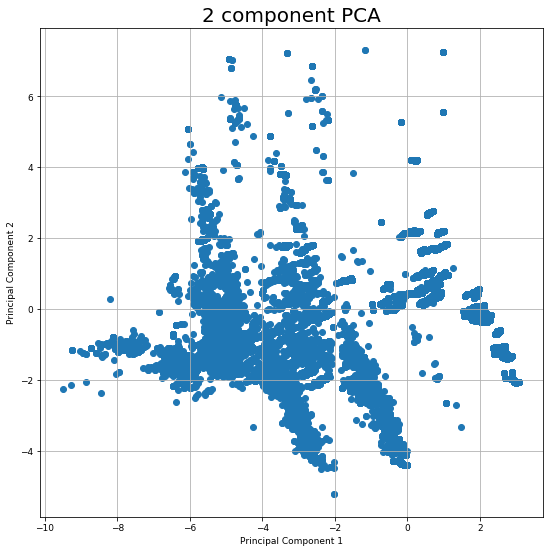

In [66]:
    fig = plt.figure(figsize = (9,9))
    ax = fig.add_subplot(1,1,1) 
    plt.scatter(PrincipalComponents['PC-1'],PrincipalComponents['PC-2'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    ax.set_title('2 component PCA', fontsize = 20)
    ax.grid()

Checking Explained Ratio of Top two components that we obtained above

In [67]:
tot = sum(ev)
ev = [(i / tot)*100 for i in sorted(ev, reverse=True)] #ev hold individual explained ratio in %
cum_var_exp = np.cumsum(ev) #cum_var_exp holds cummalitive explained ratio in %

In [68]:
print('PC1 ->',ev[0]/100) 
print('PC2->',ev[1]/100)
print('Total Explained ratio(sum of PC1 and PC2)\n')
print(cum_var_exp[1]/100)

PC1 -> 0.013598536853707184
PC2-> 0.010684822041340962
Total Explained ratio(sum of PC1 and PC2)

0.024283358895048145


Now both the components hold only 2.5% of data which is quite low

Now we will plot a step curve which indicates how many components needs to preserve to get Desired explained ratio that is 90%

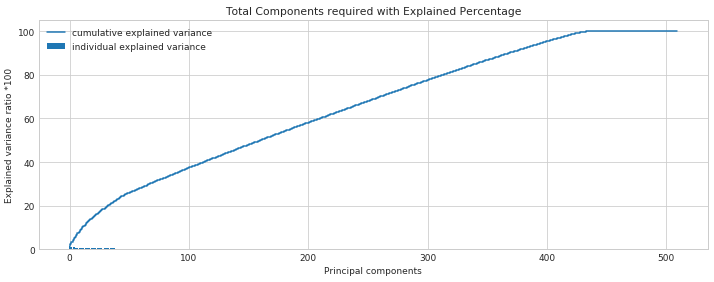

In [69]:
c =list(cum_var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 4))

    plt.bar(range(len(ev)), ev, align='center',label='individual explained variance')
    plt.step(range(cum_var_exp.size), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio *100')
    plt.xlabel('Principal components')
    plt.title('Total Components required with Explained Percentage')
    plt.legend(loc='best')
    plt.tight_layout()

As it is clear from the step plot that we will need atleast 350 components to get 90% of the data.
Thus PCA is not applicable for this dataset

## ATTRIBUTE SUBSET SELECTION

In [70]:
import scipy.stats as ss
#Using Cramer_v as to calculate the association between the attributes
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y) #Forming a n1*n2 matrix from both the attributes
    chi2 = ss.chi2_contingency(confusion_matrix)[0] #Creating a contigency matrix from above matrix
    #declaring variables
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1)) #Applying formula for phi2. Formula given in report
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))) #returning the V

In [71]:
var = list(df.columns) #var holds all the attributes of the dataset

Defining a correlation Dictionary with cor['V1']['V2'] denotes the association between these two attributes

In [72]:
cor ={} 
for x in var:
    cor[x]={}
    for y in var:
        cor[x][y]=cramers_v(df[x],df[y])

In [73]:
cor['Sector']

{'Sector': 1.0,
 'Category': 0.9989754009896733,
 'Crop': 0.9304748788229871,
 'QueryType': 0.8743916548117211,
 'StateName': 0.1228682764323052,
 'DistrictName': 0.1516001839393421,
 'BlockName': 0.1943303072869487,
 'Month': 0.06458452770076598}

In [74]:
data = {'Sector':cor['Sector'],'Category':cor['Category'],'Crop':cor['Crop'],'QueryType':cor['QueryType'],'StateName':cor['StateName'],'DistrictName':cor['DistrictName'],'BlockName':cor['BlockName'],'Month':cor['Month']}

CoRel = pd.DataFrame(data,index=var)

CoRel #dataframe representing correlation or associaton between the attributes


,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,Month
Sector,1.000000,0.998975,0.930475,0.874392,0.122868,0.151600,0.194330,0.064585
Category,0.998975,1.000000,0.979592,0.425326,0.228832,0.175587,0.220575,0.132578
Crop,0.930475,0.979592,1.000000,0.311680,0.348070,0.244563,0.124300,0.191310
QueryType,0.874392,0.425326,0.311680,1.000000,0.219879,0.131433,0.107065,0.111898
StateName,0.122868,0.228832,0.348070,0.219879,1.000000,0.999818,0.997756,0.332019
DistrictName,0.151600,0.175587,0.244563,0.131433,0.999818,1.000000,0.997938,0.549376
BlockName,0.194330,0.220575,0.124300,0.107065,0.997756,0.997938,1.000000,0.549876
Month,0.064585,0.132578,0.191310,0.111898,0.332019,0.549376,0.549876,1.000000


Generating the heatmap of association

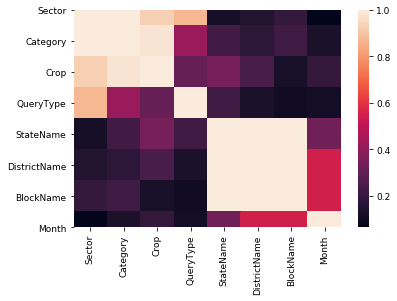

In [75]:
sns.heatmap(CoRel)

Taking association with QueryType as target variable and applying Feature subset selection
Rejecting the subset if association of any attribute in subset with QueryType is less than 0.2

In [76]:
Asubset=[]

for item in df.columns:
    if(cor['QueryType'][item]>0.2):
        Asubset.append(item)

Asubset

['Sector', 'Category', 'Crop', 'QueryType', 'StateName']

Dropping filtered Attributes

In [77]:
df.drop(['DistrictName','BlockName','Month'],axis=1,inplace=True)

# Association Analysis

Applying apriori algorithm for a specific Set of Attributes

In [78]:
#Code from apriori from scratch

In [79]:
#This function return Itemset and Transactionlist whilst taking the dataframe ,TotalSize of transactions
def getFsetTran(df,n,tot):
    records = []
    for i in range(tot):
        records.append([str(df.values[i,j]) for j in range(n)]) #Converting all the values in data frame in a LIST 'records' to strings for easy manupilation
    PSet=set()
    for i in range(tot):
        for j in range(n):
            PSet.add(records[i][j]) #Adding all the unique items in the transaction list to itemset
    
    tlist=list() 
    for item in records:
        tr = frozenset(item)
        tlist.append(tr) #Creating the final transaction List with each Transaction's datatype as a mutable set(frozenset) this is done so that basic set operation can be perfomed on them
    
    Fset =set()
    l = set()
    for item in PSet:
        l = frozenset([item]) #Similarly creating final Itemset with each item as mutable set
        Fset.add(l)
    
    return tlist,Fset #return final transaction list and Itemset
    

#Defining Required Data Structures and tools
from collections import defaultdict
from itertools import chain, combinations
freqSet = defaultdict(int) # Will take the total frequency of the items
largeSet = dict() # will hold the frequency for kth Frequent list
assocRules = dict()
toRetItems = [] #will contain the final itemset
toRetRules = [] #will contain the final rules


def returnItemMinS(itemSet,transactionList,minSupport,freqSet): #This function will prune the Canditate Sets with low support
    _itemSet = set()
    localSet = defaultdict(int)
    for item in itemSet:
            for transaction in transactionList:
                    if item.issubset(transaction):
                        freqSet[item] = 0
                        localSet[item] = 0
    for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

    for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)
    return _itemSet

def subsets(arr):
    #for generating subsets
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])

def joinSet(itemSet, length):
        #for crossing the Fk frequent set with itself
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])
#Declaring minSupport and minConfidence
minSupport=0.05
minConfidence=0.001
def apriori(Fset,tlist,minS,minC):# Applying Apriori
    minSupport=minS
    minConfidence=minC
    freqSet = defaultdict(int)
    largeSet = dict()
    assocRules = dict()
    oneCSet =returnItemMinS(Fset,tlist,minSupport,freqSet) # Frequent 1 set
    
    currentFSet= oneCSet
    k=2
    while(currentFSet != set([])): #tILL final set is NULL
        largeSet[k-1] = currentFSet
        currentFSet = joinSet(currentFSet, k) #Crossing with itself
        currentCSet = returnItemMinS(currentFSet,tlist,minSupport,freqSet) #Prunning
        currentFSet = currentCSet #Generating new Frequent Set
        k = k + 1
        
    def getSupport(item):
            """local function which Returns the support of an item"""
            return float(freqSet[item])/len(tlist)
        
    toRetItems = [] #Returning the final itemset
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])
       
        
    toRetRules = [] #Obtaining rules through confidence based pruning
    for key, value in list(largeSet.items())[1:]:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules



import operator

def printResults(items, rules):
    for item, support in sorted(items, key=operator.itemgetter(1)):
        print("item: %s ,support -> %.6f " % (str(item), support))
    print("\n------------------------ \nRULES:")
    for rule, confidence in sorted(rules, key=operator.itemgetter(1)):
        pre, post = rule
        print("Rule: %s ===> %s\n confidence -> %.3f" % (str(pre), str(post), confidence))

def getRecords(data,tlen): #Converting the dataframe into a list
    rec=[]
    for i in range(len(data)):
        rec.append([str(data.values[i,j]) for j in range(tlen)])
    return rec
##All of the above code is wrapped within the method fullApriori which just take dataframe ,Minsupport and minConfidence as an input 
#And print the rules as the output

def fullApriori(data,minS,minC):
    records=[]
    tlist=[]
    Fset=[]
    records = getRecords(data,len(data.columns))
    tlist,Fset = getFsetTran(data,len(data.columns),len(records))
    item,rules = apriori(Fset,tlist,minS,minC)
    printResults(item,rules)

In [80]:

t1=df['Crop']
t2 = df['QueryType']
t3=df['StateName']
CropQ= pd.concat([t1,t2],axis=1)

Taking Crop,QueryType and State as itemsets

In [81]:

StateQ =pd.concat([t1,t2,t3],axis=1)
StateQ

,Crop,QueryType,StateName
0,Others,Weather,HARYANA
1,Others,Weather,HARYANA
2,Others,Weather,HARYANA
3,Others,Weather,HARYANA
4,Others,Weather,HARYANA
...,...,...,...
43946,Others,Weather,RAJASTHAN
43947,Others,Market Information,RAJASTHAN
43948,Others,Government Schemes,RAJASTHAN
43949,Cumin,Nutrient Management,RAJASTHAN


Applying apriori

In [82]:
fullApriori(StateQ,0.2,0.01)

item: ('RAJASTHAN',) ,support -> 0.233510 
item: ('Weather', 'HARYANA', 'Others') ,support -> 0.354599 
item: ('Weather', 'HARYANA') ,support -> 0.356670 
item: ('HARYANA', 'Others') ,support -> 0.394621 
item: ('Weather', 'Others') ,support -> 0.541467 
item: ('Weather',) ,support -> 0.544789 
item: ('HARYANA',) ,support -> 0.551250 
item: ('Others',) ,support -> 0.650156 

------------------------ 
RULES:
Rule: ('Others',) ===> ('Weather', 'HARYANA')
 confidence -> 0.545
Rule: ('Others',) ===> ('HARYANA',)
 confidence -> 0.607
Rule: ('HARYANA',) ===> ('Weather', 'Others')
 confidence -> 0.643
Rule: ('HARYANA',) ===> ('Weather',)
 confidence -> 0.647
Rule: ('Weather',) ===> ('HARYANA', 'Others')
 confidence -> 0.651
Rule: ('Weather',) ===> ('HARYANA',)
 confidence -> 0.655
Rule: ('Weather', 'Others') ===> ('HARYANA',)
 confidence -> 0.655
Rule: ('HARYANA',) ===> ('Others',)
 confidence -> 0.716
Rule: ('Others',) ===> ('Weather',)
 confidence -> 0.833
Rule: ('HARYANA', 'Others') ===> (

Without considering others in crop to get some info about the specific crops

In [118]:
OStateQ=StateQ[StateQ['Crop']!='Others']
OStateQ.reset_index(drop=True,inplace=True)

OStateQ

,Crop,QueryType,StateName
0,Potato,Plant Protection,HARYANA
1,Paddy (Dhan),Training and Exposure Visits,HARYANA
2,Potato,Plant Protection,HARYANA
3,Wheat,Weed Management,HARYANA
4,Wheat,Bio-Pesticides and Bio-Fertilizers,HARYANA
...,...,...,...
15371,Cumin,Plant Protection,RAJASTHAN
15372,Cumin,Nutrient Management,RAJASTHAN
15373,Cumin,Plant Protection,RAJASTHAN
15374,Cumin,Nutrient Management,RAJASTHAN


## Jammu Kashmir

In [84]:
JamQ = StateQ[StateQ['StateName']=='JAMMU AND KASHMIR']
JamQ.reset_index(drop=True,inplace=True)

fullApriori(JamQ,0.2,0.01)

item: ('Weather', 'Others') ,support -> 0.470060 
item: ('Weather', 'Others', 'JAMMU AND KASHMIR') ,support -> 0.470060 
item: ('Weather',) ,support -> 0.471058 
item: ('Weather', 'JAMMU AND KASHMIR') ,support -> 0.471058 
item: ('Others',) ,support -> 0.576846 
item: ('Others', 'JAMMU AND KASHMIR') ,support -> 0.576846 
item: ('JAMMU AND KASHMIR',) ,support -> 1.000000 

------------------------ 
RULES:
Rule: ('JAMMU AND KASHMIR',) ===> ('Weather', 'Others')
 confidence -> 0.470
Rule: ('JAMMU AND KASHMIR',) ===> ('Weather',)
 confidence -> 0.471
Rule: ('JAMMU AND KASHMIR',) ===> ('Others',)
 confidence -> 0.577
Rule: ('Others',) ===> ('Weather',)
 confidence -> 0.815
Rule: ('Others',) ===> ('Weather', 'JAMMU AND KASHMIR')
 confidence -> 0.815
Rule: ('Others', 'JAMMU AND KASHMIR') ===> ('Weather',)
 confidence -> 0.815
Rule: ('Weather',) ===> ('Others',)
 confidence -> 0.998
Rule: ('Weather',) ===> ('Others', 'JAMMU AND KASHMIR')
 confidence -> 0.998
Rule: ('Weather', 'JAMMU AND KASHMI

In [85]:
### Without Others
JamQ = OStateQ[OStateQ['StateName']=='JAMMU AND KASHMIR'][['Crop','QueryType']]
JamQ.reset_index(drop=True,inplace=True)

fullApriori(JamQ,0.04,0.1)

item: ('Maize (Makka)',) ,support -> 0.040094 
item: ('Dairy Production',) ,support -> 0.056604 
item: ('Seeds and Planting Material',) ,support -> 0.056604 
item: ('Dairy Production', 'Bovine(Cow,Buffalo)') ,support -> 0.056604 
item: ('Mango', 'Nutrient Management') ,support -> 0.056604 
item: ('Paddy (Dhan)', 'Plant Protection') ,support -> 0.058962 
item: ('Weed Management',) ,support -> 0.075472 
item: ('Wheat',) ,support -> 0.080189 
item: ('Mango',) ,support -> 0.082547 
item: ('Bovine(Cow,Buffalo)',) ,support -> 0.113208 
item: ('Nutrient Management',) ,support -> 0.148585 
item: ('Cultural Practices',) ,support -> 0.153302 
item: ('Paddy (Dhan)',) ,support -> 0.165094 
item: ('Plant Protection',) ,support -> 0.316038 

------------------------ 
RULES:
Rule: ('Plant Protection',) ===> ('Paddy (Dhan)',)
 confidence -> 0.187
Rule: ('Paddy (Dhan)',) ===> ('Plant Protection',)
 confidence -> 0.357
Rule: ('Nutrient Management',) ===> ('Mango',)
 confidence -> 0.381
Rule: ('Bovine(Co

In [86]:
TN = StateQ[StateQ['StateName']=='TAMILNADU'][['Crop','QueryType']]
TN.reset_index(drop=True,inplace=True)
fullApriori(TN,0.05,0.1)

item: ('Market Information', 'Others') ,support -> 0.053506 
item: ('Seeds',) ,support -> 0.054736 
item: ('Fertilizer Use and Availability',) ,support -> 0.064576 
item: ('Cultural Practices',) ,support -> 0.067036 
item: ('Paddy (Dhan)', 'Nutrient Management') ,support -> 0.070726 
item: ('Groundnut (pea nut/mung phalli)',) ,support -> 0.074416 
item: ('Paddy (Dhan)', 'Plant Protection') ,support -> 0.075031 
item: ('Market Information',) ,support -> 0.081796 
item: ('Weather', 'Others') ,support -> 0.092251 
item: ('Weather',) ,support -> 0.098401 
item: ('Nutrient Management',) ,support -> 0.220787 
item: ('Plant Protection',) ,support -> 0.227552 
item: ('Paddy (Dhan)',) ,support -> 0.236162 
item: ('Others',) ,support -> 0.257073 

------------------------ 
RULES:
Rule: ('Others',) ===> ('Market Information',)
 confidence -> 0.208
Rule: ('Paddy (Dhan)',) ===> ('Nutrient Management',)
 confidence -> 0.299
Rule: ('Paddy (Dhan)',) ===> ('Plant Protection',)
 confidence -> 0.318
Rule

In [87]:
# Without Others
TN= TN[TN['Crop']!='Others']
TN.reset_index(drop=True,inplace=True)
fullApriori(TN,0.03,0.1)

item: ('Brinjal',) ,support -> 0.033113 
item: ('Chillies',) ,support -> 0.033113 
item: ('Bhindi(Okra/Ladysfinger)',) ,support -> 0.033940 
item: ('Seeds and Planting Material',) ,support -> 0.033940 
item: ('Paddy (Dhan)', 'Fertilizer Use and Availability') ,support -> 0.034768 
item: ('Seeds',) ,support -> 0.038079 
item: ('Market Information',) ,support -> 0.038079 
item: ('Banana',) ,support -> 0.038907 
item: ('Watermelon',) ,support -> 0.043046 
item: ('Sesame (Gingelly/Til)/Sesamum',) ,support -> 0.044702 
item: ('Varieties',) ,support -> 0.049669 
item: ('Black Gram (urd bean)',) ,support -> 0.057119 
item: ('Cultural Practices',) ,support -> 0.072020 
item: ('Fertilizer Use and Availability',) ,support -> 0.086093 
item: ('Paddy (Dhan)', 'Nutrient Management') ,support -> 0.095199 
item: ('Groundnut (pea nut/mung phalli)',) ,support -> 0.100166 
item: ('Paddy (Dhan)', 'Plant Protection') ,support -> 0.100993 
item: ('Nutrient Management',) ,support -> 0.279801 
item: ('Plant 

# Gujarat

In [88]:
GJ = StateQ[StateQ['StateName']=='GUJARAT'][['Crop','QueryType']]
GJ.reset_index(drop=True,inplace=True)

fullApriori(GJ,0.02,0.1)

item: ('Seeds',) ,support -> 0.021215 
item: ('Chillies',) ,support -> 0.021631 
item: ('Wheat',) ,support -> 0.022047 
item: ('Mango',) ,support -> 0.025790 
item: ('Paddy (Dhan)',) ,support -> 0.029534 
item: ('Cultural Practices', 'Others') ,support -> 0.030366 
item: ('Varieties',) ,support -> 0.030782 
item: ('Castor (Rehri, Rendi, Arandi) ',) ,support -> 0.052413 
item: ('Cotton (Kapas)', 'Plant Protection') ,support -> 0.062812 
item: ('Fertilizer Use and Availability',) ,support -> 0.063644 
item: ('Cotton (Kapas)',) ,support -> 0.096506 
item: ('Cultural Practices',) ,support -> 0.128952 
item: ('Weather', 'Others') ,support -> 0.157654 
item: ('Weather',) ,support -> 0.160982 
item: ('Plant Protection',) ,support -> 0.232945 
item: ('Government Schemes', 'Others') ,support -> 0.237521 
item: ('Government Schemes',) ,support -> 0.240433 
item: ('Others',) ,support -> 0.471298 

------------------------ 
RULES:
Rule: ('Cultural Practices',) ===> ('Others',)
 confidence -> 0.235

In [89]:
#without Others
GJ= GJ[GJ['Crop']!='Others']
GJ.reset_index(drop=True,inplace=True)

fullApriori(GJ,0.02,0.1)

item: ('Seeds and Planting Material',) ,support -> 0.021243 
item: ('Varieties', 'Castor (Rehri, Rendi, Arandi) ') ,support -> 0.021243 
item: ('Brinjal', 'Plant Protection') ,support -> 0.022030 
item: ('Sesame (Gingelly/Til)/Sesamum',) ,support -> 0.022817 
item: ('Bhindi(Okra/Ladysfinger)',) ,support -> 0.022817 
item: ('Paddy (Dhan)', 'Plant Protection') ,support -> 0.022817 
item: ('Green Gram (Moong Bean/ Moong)',) ,support -> 0.023603 
item: ('Sowing Time and Weather',) ,support -> 0.025964 
item: ('Mango', 'Plant Protection') ,support -> 0.025964 
item: ('Weed Management',) ,support -> 0.026751 
item: ('Maize (Makka)',) ,support -> 0.026751 
item: ('Chillies', 'Plant Protection') ,support -> 0.027537 
item: ('Pigeon pea (red gram/arhar/tur)',) ,support -> 0.028324 
item: ('Brinjal',) ,support -> 0.030685 
item: ('Seeds',) ,support -> 0.036192 
item: ('Castor (Rehri, Rendi, Arandi) ', 'Plant Protection') ,support -> 0.036192 
item: ('Chillies',) ,support -> 0.040913 
item: ('Whe

# Rajasthan

In [90]:
RJ = StateQ[StateQ['StateName']=='RAJASTHAN'][['Crop','QueryType']]
RJ.reset_index(drop=True,inplace=True)
fullApriori(RJ,0.04,0.1)

item: ('Market Information', 'Others') ,support -> 0.042970 
item: ('Cumin', 'Plant Protection') ,support -> 0.051739 
item: ('Bengal Gram',) ,support -> 0.051837 
item: ('Market Information',) ,support -> 0.056806 
item: ('Government Schemes', 'Others') ,support -> 0.062652 
item: ('Government Schemes',) ,support -> 0.065770 
item: ('Wheat',) ,support -> 0.068693 
item: ('Cumin',) ,support -> 0.076781 
item: ('Nutrient Management',) ,support -> 0.102114 
item: ('Plant Protection',) ,support -> 0.204131 
item: ('Weather', 'Others') ,support -> 0.474715 
item: ('Weather',) ,support -> 0.477736 
item: ('Others',) ,support -> 0.618435 

------------------------ 
RULES:
Rule: ('Others',) ===> ('Government Schemes',)
 confidence -> 0.101
Rule: ('Plant Protection',) ===> ('Cumin',)
 confidence -> 0.253
Rule: ('Cumin',) ===> ('Plant Protection',)
 confidence -> 0.674
Rule: ('Market Information',) ===> ('Others',)
 confidence -> 0.756
Rule: ('Others',) ===> ('Weather',)
 confidence -> 0.768
Ru

In [91]:

#without Others
RJ= RJ[RJ['Crop']!='Others']
RJ.reset_index(drop=True,inplace=True)

fullApriori(RJ,0.04,0.1)

item: ('Mustard', 'Plant Protection') ,support -> 0.041624 
item: ('Cumin', 'Nutrient Management') ,support -> 0.042135 
item: ('Mustard',) ,support -> 0.063075 
item: ('Wheat', 'Plant Protection') ,support -> 0.063075 
item: ('Wheat', 'Nutrient Management') ,support -> 0.072778 
item: ('Bengal Gram', 'Plant Protection') ,support -> 0.096272 
item: ('Cumin', 'Plant Protection') ,support -> 0.135598 
item: ('Bengal Gram',) ,support -> 0.135853 
item: ('Wheat',) ,support -> 0.180031 
item: ('Cumin',) ,support -> 0.201226 
item: ('Nutrient Management',) ,support -> 0.256129 
item: ('Plant Protection',) ,support -> 0.510470 

------------------------ 
RULES:
Rule: ('Plant Protection',) ===> ('Wheat',)
 confidence -> 0.124
Rule: ('Nutrient Management',) ===> ('Cumin',)
 confidence -> 0.165
Rule: ('Plant Protection',) ===> ('Bengal Gram',)
 confidence -> 0.189
Rule: ('Cumin',) ===> ('Nutrient Management',)
 confidence -> 0.209
Rule: ('Plant Protection',) ===> ('Cumin',)
 confidence -> 0.266


## Category - QueryType  State Association Analysis

In [92]:
CatQS= df[['Category','QueryType','StateName']]

fullApriori(CatQS,0.08,0.01)

item: ('Cereals', 'HARYANA') ,support -> 0.085459 
item: ('UTTAR PRADESH',) ,support -> 0.100749 
item: ('Weather', 'RAJASTHAN', 'Others') ,support -> 0.110987 
item: ('Weather', 'RAJASTHAN') ,support -> 0.111556 
item: ('Cereals',) ,support -> 0.122887 
item: ('RAJASTHAN', 'Others') ,support -> 0.144525 
item: ('Plant Protection',) ,support -> 0.153899 
item: ('RAJASTHAN',) ,support -> 0.233510 
item: ('Weather', 'HARYANA', 'Others') ,support -> 0.355487 
item: ('Weather', 'HARYANA') ,support -> 0.356670 
item: ('HARYANA', 'Others') ,support -> 0.395213 
item: ('Weather', 'Others') ,support -> 0.542650 
item: ('Weather',) ,support -> 0.544789 
item: ('HARYANA',) ,support -> 0.551250 
item: ('Others',) ,support -> 0.650656 

------------------------ 
RULES:
Rule: ('HARYANA',) ===> ('Cereals',)
 confidence -> 0.155
Rule: ('Others',) ===> ('Weather', 'RAJASTHAN')
 confidence -> 0.171
Rule: ('Weather',) ===> ('RAJASTHAN', 'Others')
 confidence -> 0.204
Rule: ('Weather', 'Others') ===> ('R

In [93]:
CatQ= df[['Category','QueryType']]

fullApriori(CatQ,0.02,0.01)

item: ('Weed Management',) ,support -> 0.020068 
item: ('Market Information', 'Others') ,support -> 0.020841 
item: ('Oilseeds',) ,support -> 0.022184 
item: ('Pulses',) ,support -> 0.023094 
item: ('Condiments and Spices',) ,support -> 0.023549 
item: ('Market Information',) ,support -> 0.027030 
item: ('Cultural Practices',) ,support -> 0.029692 
item: ('Vegetables', 'Plant Protection') ,support -> 0.031239 
item: ('Fruits',) ,support -> 0.032013 
item: ('Cereals', 'Plant Protection') ,support -> 0.045232 
item: ('Nutrient Management',) ,support -> 0.051307 
item: ('Government Schemes', 'Others') ,support -> 0.058929 
item: ('Vegetables',) ,support -> 0.061910 
item: ('Government Schemes',) ,support -> 0.062206 
item: ('Cereals',) ,support -> 0.122887 
item: ('Plant Protection',) ,support -> 0.153899 
item: ('Weather', 'Others') ,support -> 0.542650 
item: ('Weather',) ,support -> 0.544789 
item: ('Others',) ,support -> 0.650656 

------------------------ 
RULES:
Rule: ('Others',) ==

In [94]:
#Without Others
CatQ= CatQ[CatQ['Category']!='Others']
CatQ.reset_index(drop=True,inplace=True)

fullApriori(CatQ,0.04,0.01)

item: ('Condiments and Spices', 'Plant Protection') ,support -> 0.040901 
item: ('Weed Management', 'Cereals') ,support -> 0.041618 
item: ('Fruits', 'Plant Protection') ,support -> 0.047675 
item: ('Varieties',) ,support -> 0.050801 
item: ('Fertilizer Use and Availability',) ,support -> 0.051452 
item: ('Weed Management',) ,support -> 0.054448 
item: ('Cereals', 'Nutrient Management') ,support -> 0.056011 
item: ('Oilseeds',) ,support -> 0.063501 
item: ('Pulses',) ,support -> 0.066107 
item: ('Condiments and Spices',) ,support -> 0.067409 
item: ('Cultural Practices',) ,support -> 0.073206 
item: ('Vegetables', 'Plant Protection') ,support -> 0.089423 
item: ('Fruits',) ,support -> 0.091637 
item: ('Cereals', 'Plant Protection') ,support -> 0.129478 
item: ('Nutrient Management',) ,support -> 0.141852 
item: ('Vegetables',) ,support -> 0.177218 
item: ('Cereals',) ,support -> 0.351765 
item: ('Plant Protection',) ,support -> 0.427576 

------------------------ 
RULES:
Rule: ('Plant 

# Cluster Analysis

## Ensemble Selection

In [95]:
m=df.shape[0]
m

43951

In [96]:
toplabs=[x for x in df.QueryType.value_counts().sort_values(ascending=False).head(10).index]
topcat=[x for x in df.Category.value_counts().sort_values(ascending=False).head(10).index]
topcrop=[x for x in df.Crop.value_counts().sort_values(ascending=False).head(10).index]
print("Running Ensemble Encoding on QueryType.......")
df = df[df['QueryType'].isin(toplabs)]
print("Running Ensemble Encoding on Category.......")
df = df[df['Category'].isin(topcat)]
print("Running Ensemble Encoding on Crop.......")
df = df[df['Crop'].isin(topcrop)]
print("Ensemble Encoding done!")
df2=df #preserving a copy
df.shape

Running Ensemble Encoding on QueryType.......
Running Ensemble Encoding on Category.......
Running Ensemble Encoding on Crop.......
Ensemble Encoding done!


(36420, 5)

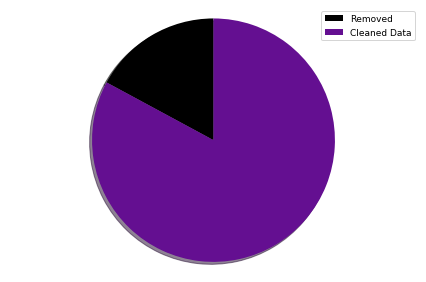

In [97]:
labels = ['Removed', 'Cleaned Data']
sizes = [m-df.shape[0], df.shape[0]]
colors = ['black', '#640f91']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

## Label Encoding

In [98]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df=df.apply(le.fit_transform)
df.head()
dfmca=df

# K-Modes Clustering

## Getting Optimal Number of Clusters K

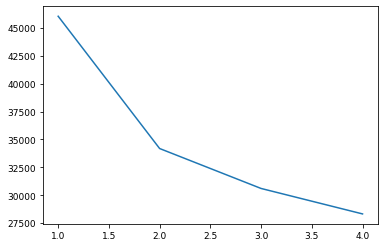

In [99]:
from kmodes.kmodes import KModes
cost=[]
for num_clusters in list(range(1,5)):
    kmode=KModes(n_clusters=num_clusters,init="Cao",n_init=1,verbose=0)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
y=np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

## Selecting optimal k=2 using Elbow Method

In [100]:
km=KModes(n_clusters=2,init="Cao",n_init=2,verbose=1)
fitclus=km.fit_predict(df)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2544, cost: 34748.0
Run 1, iteration: 2/100, moves: 1320, cost: 34188.0
Run 1, iteration: 3/100, moves: 21, cost: 34188.0


In [101]:
cluster_centroids=pd.DataFrame(km.cluster_centroids_)
cluster_centroids.columns=df.columns
dfclus=df
cluster_centroids

,Sector,Category,Crop,QueryType,StateName
0,0,5,6,8,1
1,0,0,7,6,1


#### Resetting Index using original copy

In [102]:
df=df2.reset_index()

## Adding Cluster_predicted Column

In [103]:
clusterdf=pd.DataFrame(fitclus)
clusterdf.columns=['Cluster_predicted']
combineddf=pd.concat([df,clusterdf],axis=1).reset_index()
combineddf=combineddf.drop(['index','level_0'],axis=1)
combineddf.head().style.background_gradient(cmap='hot_r')

,Sector,Category,Crop,QueryType,StateName,Cluster_predicted
0,AGRICULTURE,Others,Others,Weather,HARYANA,0
1,AGRICULTURE,Others,Others,Weather,HARYANA,0
2,AGRICULTURE,Others,Others,Weather,HARYANA,0
3,AGRICULTURE,Others,Others,Weather,HARYANA,0
4,AGRICULTURE,Others,Others,Weather,HARYANA,0


# Visulaization of K-Modes Clustering

In [104]:
flatui = ["#493354", "#a82030", "#127ea6"]
sns.set_palette(flatui)
plt.rcParams.update({'font.size': 20})

<Figure size 432x288 with 0 Axes>

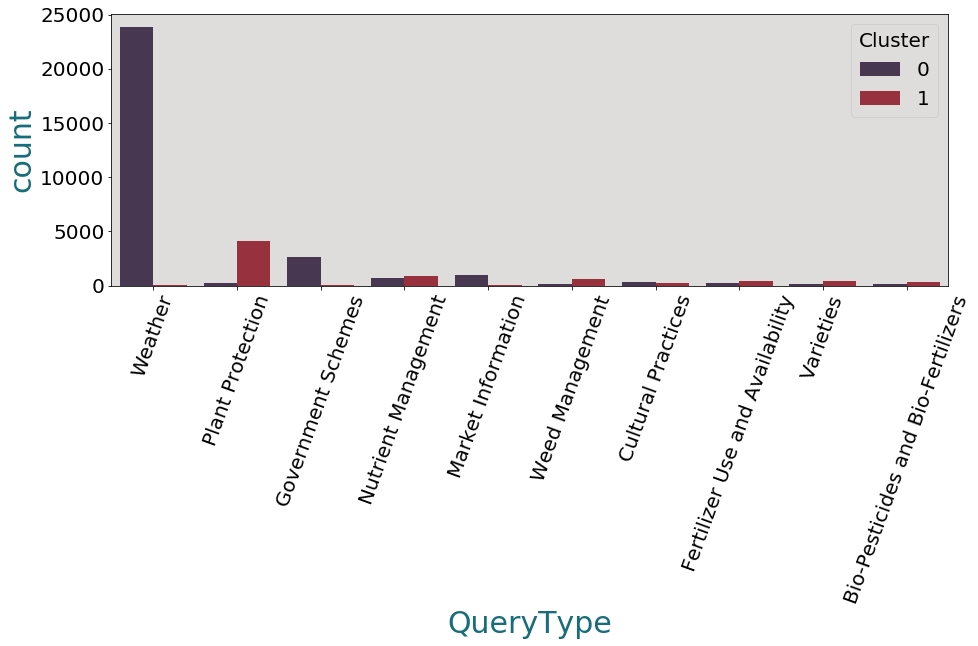

<Figure size 432x288 with 0 Axes>

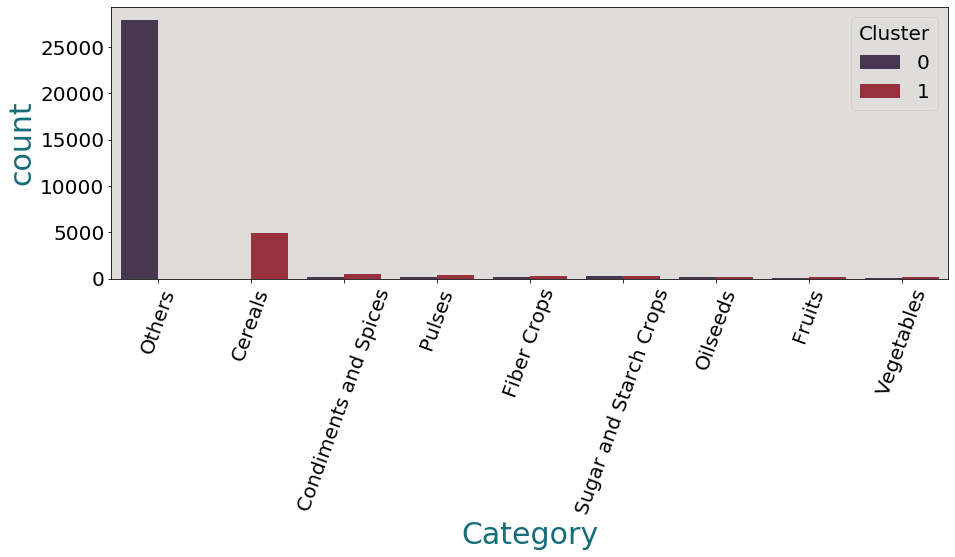

<Figure size 432x288 with 0 Axes>

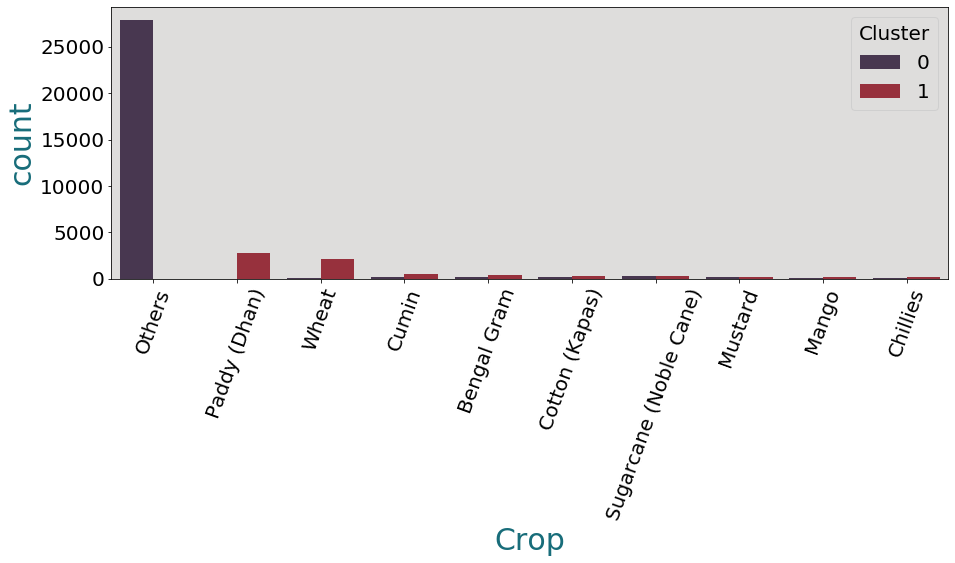

<Figure size 432x288 with 0 Axes>

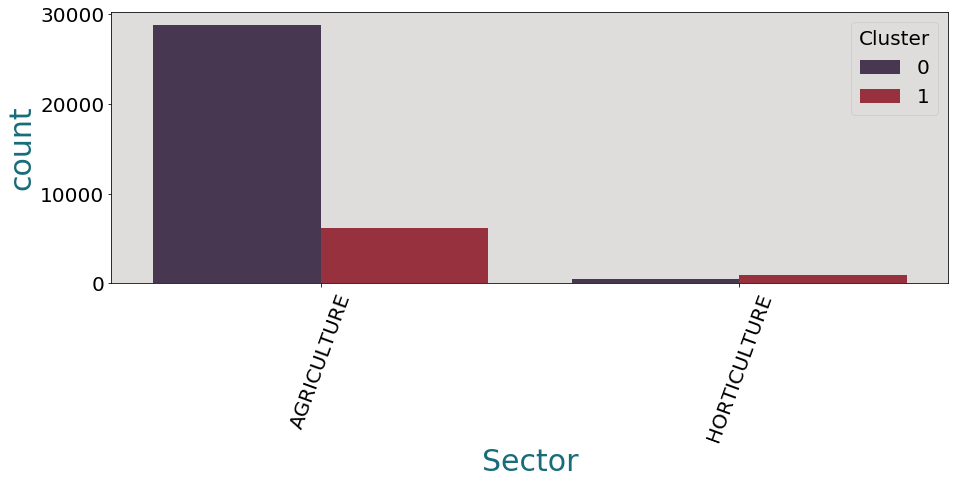

<Figure size 432x288 with 0 Axes>

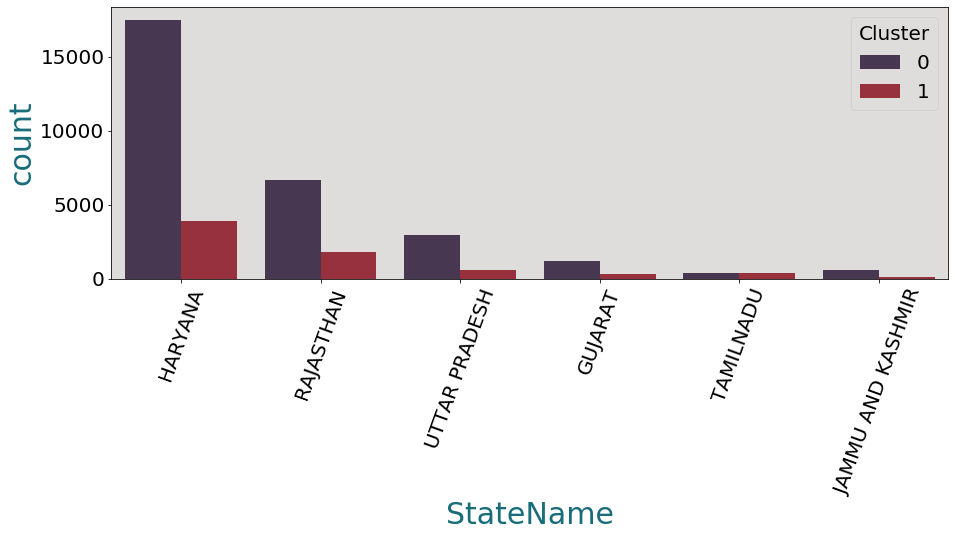

In [105]:
cols=['QueryType','Category','Crop','Sector','StateName']
for var in cols:
    with axes_style({'axes.facecolor': '#dedddc'}):
        plt.figure()
        plt.subplots(figsize=(15,5))
        g=sns.countplot(x=combineddf[var],order=combineddf[var].value_counts().index,hue=combineddf['Cluster_predicted'])
        plt.xticks(rotation=70,color='#000000')
        plt.yticks(color='#000000')
        g.xaxis.label.set_color('#186d7a')
        g.xaxis.label.set_fontsize(30)
        g.yaxis.label.set_fontsize(30)
        g.yaxis.label.set_color('#186d7a')
        plt.legend(title="Cluster",loc='upper right')

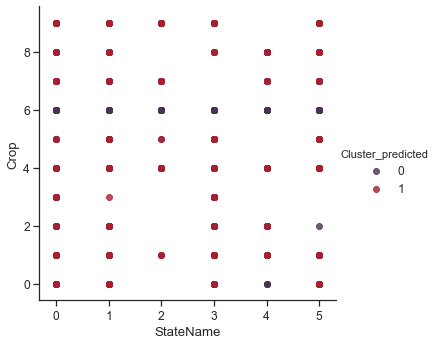

In [106]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
dfm=combineddf
le=preprocessing.LabelEncoder()
dfm=dfm.apply(le.fit_transform)
sns.lmplot('StateName','Crop',data=dfm,fit_reg=False, hue='Cluster_predicted') 

# Outlier Analysis

## Using Clustering

In [107]:
km=KModes(n_clusters=40,init="Cao",n_init=1,verbose=0)
fitclus=km.fit_predict(df)

In [108]:
clusterdf=pd.DataFrame(fitclus)
clusterdf.columns=['Cluster_predicted']
combineddf=pd.concat([df,clusterdf],axis=1).reset_index()
combineddf=combineddf.drop(['index','level_0'],axis=1)
combineddf.head().style.background_gradient(cmap='hot_r')

,Sector,Category,Crop,QueryType,StateName,Cluster_predicted
0,AGRICULTURE,Others,Others,Weather,HARYANA,0
1,AGRICULTURE,Others,Others,Weather,HARYANA,0
2,AGRICULTURE,Others,Others,Weather,HARYANA,0
3,AGRICULTURE,Others,Others,Weather,HARYANA,0
4,AGRICULTURE,Others,Others,Weather,HARYANA,0


In [109]:
clusno=combineddf['Cluster_predicted'].tolist()
arr=combineddf['Cluster_predicted'].unique()
clusno_o=[i for i in arr if clusno.count(i)<100]
clusno_o

[14, 19, 11, 23, 27, 26, 17, 30, 32, 28, 25, 10, 7, 9, 39, 36, 38]

### Outlier Objects obtained from Clustering

In [110]:
outlier=combineddf[combineddf['Cluster_predicted'].isin(clusno_o)]
outlier.head(10)

,Sector,Category,Crop,QueryType,StateName,Cluster_predicted
187,AGRICULTURE,Pulses,Bengal Gram,Plant Protection,HARYANA,14
261,AGRICULTURE,Oilseeds,Mustard,Bio-Pesticides and Bio-Fertilizers,HARYANA,19
331,AGRICULTURE,Pulses,Bengal Gram,Bio-Pesticides and Bio-Fertilizers,HARYANA,14
339,AGRICULTURE,Oilseeds,Mustard,Bio-Pesticides and Bio-Fertilizers,HARYANA,11
394,AGRICULTURE,Oilseeds,Mustard,Weed Management,HARYANA,11
473,AGRICULTURE,Others,Others,Nutrient Management,HARYANA,23
629,AGRICULTURE,Pulses,Bengal Gram,Plant Protection,HARYANA,14
936,AGRICULTURE,Oilseeds,Mustard,Government Schemes,HARYANA,11
1013,HORTICULTURE,Vegetables,Chillies,Fertilizer Use and Availability,HARYANA,27
1044,HORTICULTURE,Vegetables,Others,Cultural Practices,HARYANA,26


In [111]:
df.shape[0]

36420

In [112]:
combineddf=combineddf[~combineddf['Cluster_predicted'].isin(clusno_o)]
combineddf.shape

(35912, 6)

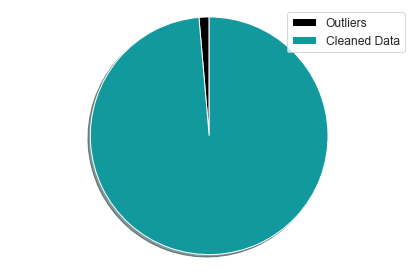

In [113]:
labels = ['Outliers', 'Cleaned Data']
sizes = [df.shape[0]-combineddf.shape[0], df.shape[0]]
colors = ['black', '#11999e']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Using Z-Score

In [114]:
from scipy import stats
z = np.abs(stats.zscore(dfmca))
print(z)

[[2.00462151e-01 4.11999009e-01 2.22465310e-03 5.72032163e-01
  6.43600050e-01]
 [2.00462151e-01 4.11999009e-01 2.22465310e-03 5.72032163e-01
  6.43600050e-01]
 [2.00462151e-01 4.11999009e-01 2.22465310e-03 5.72032163e-01
  6.43600050e-01]
 ...
 [2.00462151e-01 4.11999009e-01 2.22465310e-03 1.91292828e+00
  7.95137601e-01]
 [4.98847285e+00 1.72538982e+00 2.12992971e+00 9.18944103e-01
  7.95137601e-01]
 [2.00462151e-01 1.72538982e+00 2.12992971e+00 5.72032163e-01
  7.95137601e-01]]


### Outlier Objects obtained from Z-Score

In [115]:
print(np.where(z > 3))

(array([   53,    63,    82, ..., 36411, 36414, 36418], dtype=int64), array([3, 3, 3, ..., 0, 0, 0], dtype=int64))


### Selecting objects with z>3

In [116]:
df_z = df[(z < 3).all(axis=1)]
df_z.shape

(33987, 6)

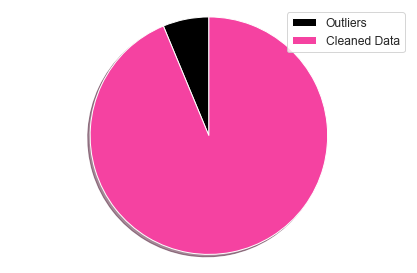

In [117]:
labels = ['Outliers', 'Cleaned Data']
sizes = [-df_z.shape[0]+df.shape[0], df.shape[0]]
colors = ['black', '#f542a1']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

# END